# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [3]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [4]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [5]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [6]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [7]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [8]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

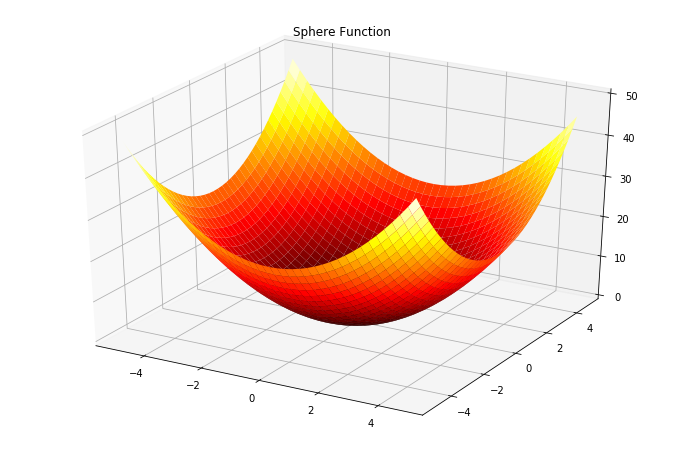

In [9]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

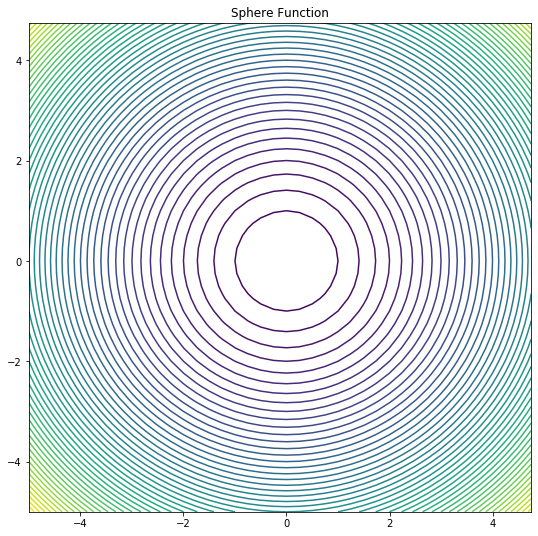

In [10]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

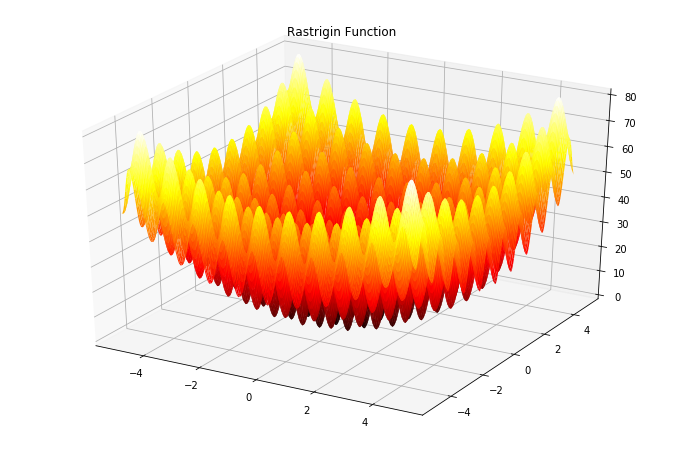

In [11]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

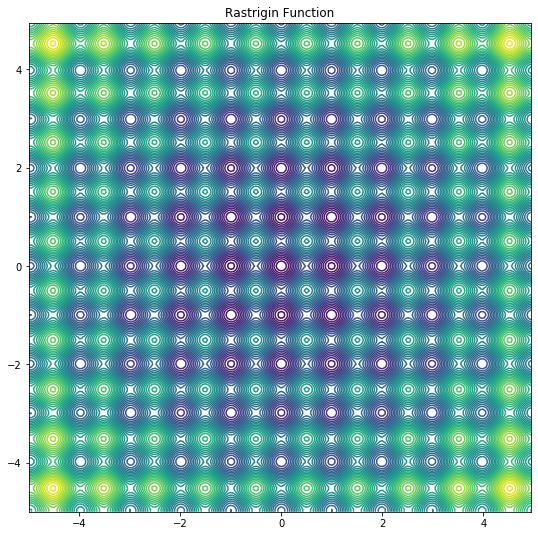

In [12]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

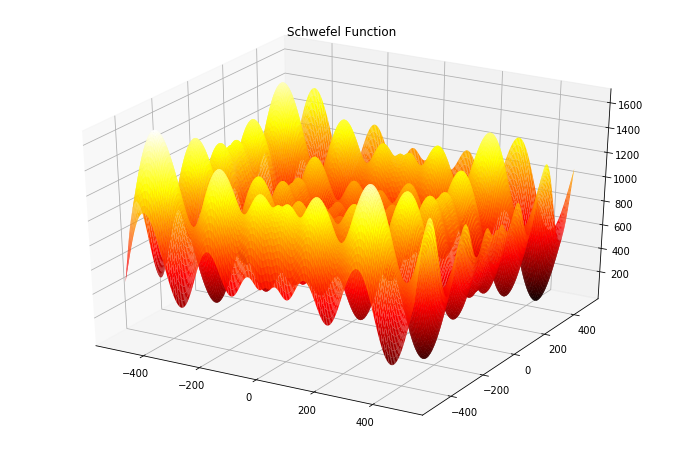

In [13]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

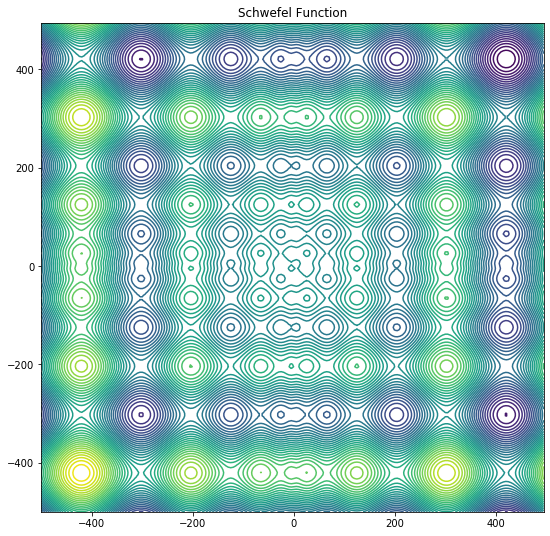

In [14]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

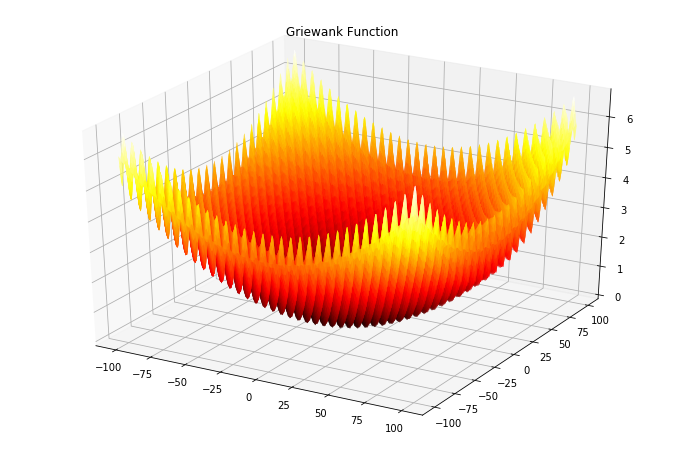

In [15]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

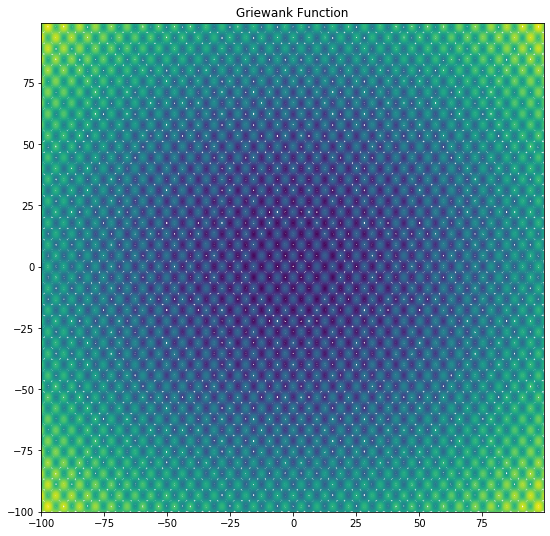

In [16]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [17]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [18]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

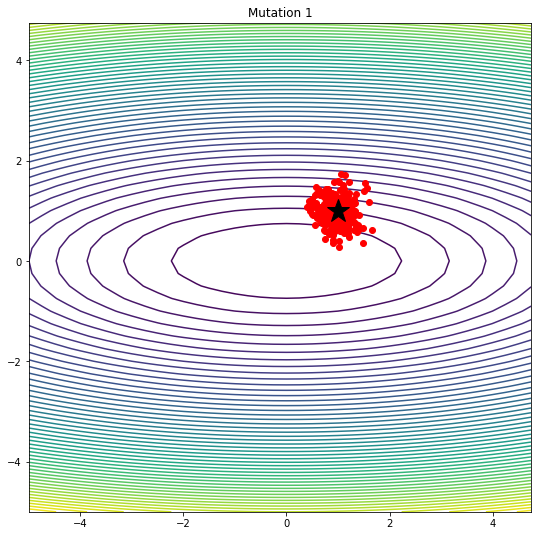

In [19]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [20]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

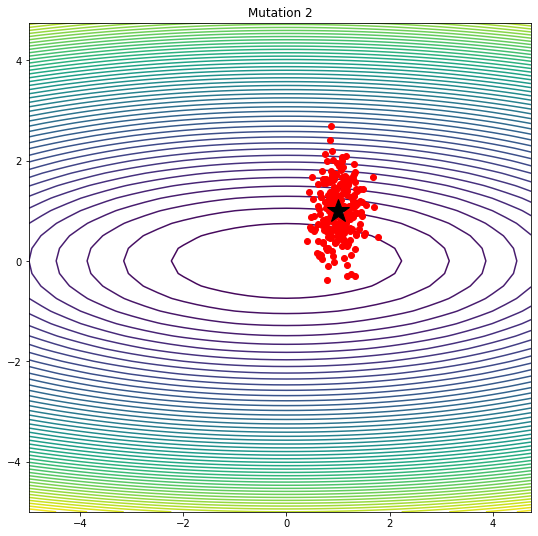

In [21]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [22]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

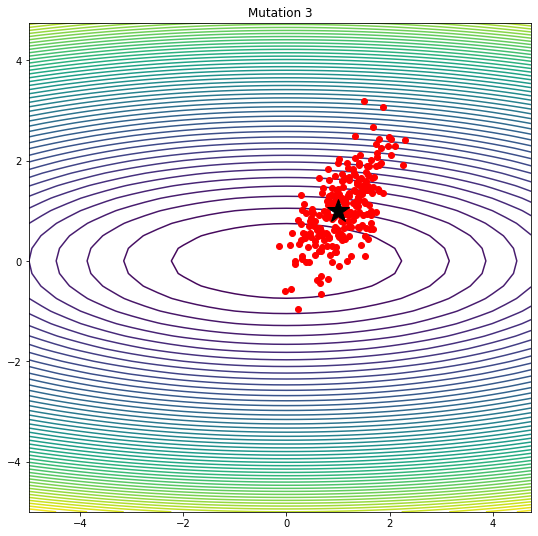

In [23]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [24]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = -100000000.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -4361.33247159, mean score = -26708.29058192.
Iteration 0010 : best score = -43.99634254, mean score = -215.02365869.
Iteration 0020 : best score = -0.07920940, mean score = -0.53246392.
Iteration 0030 : best score = -0.00009781, mean score = -0.00117330.
Iteration 0040 : best score = -0.00000032, mean score = -0.00000212.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


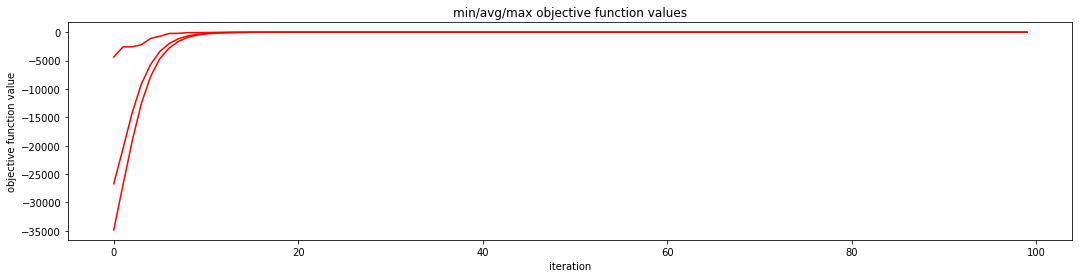

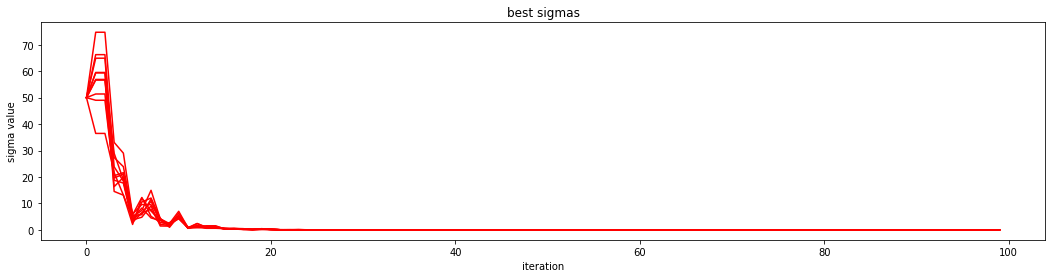

In [25]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -4081.65831013, mean score = -26395.91214053.
Iteration 0010 : best score = -94.80235002, mean score = -299.47532855.
Iteration 0020 : best score = -35.76992664, mean score = -76.10450714.
Iteration 0030 : best score = -15.49544059, mean score = -62.11498552.
Iteration 0040 : best score = -15.49544059, mean score = -55.79576997.
Iteration 0050 : best score = -15.49544059, mean score = -51.62645715.
Iteration 0060 : best score = -11.03017718, mean score = -43.46033115.
Iteration 0070 : best score = -1.10011947, mean score = -1.65521782.
Iteration 0080 : best score = -0.99525193, mean score = -0.99648495.
Iteration 0090 : best score = -0.99495939, mean score = -0.99496197.


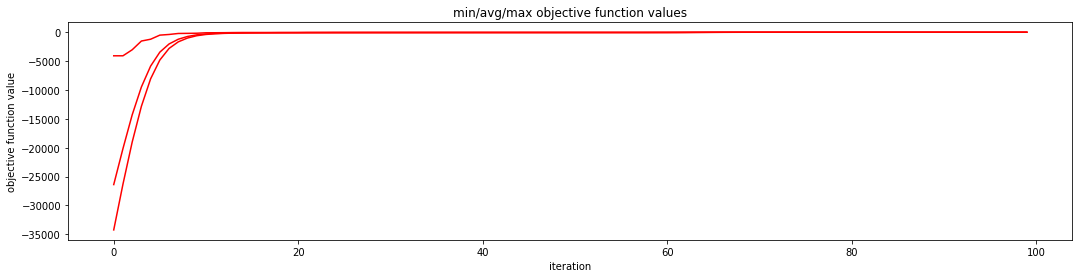

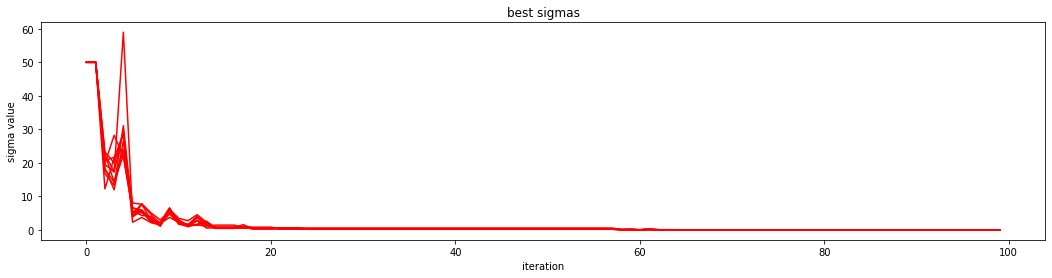

In [26]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.87137032, mean score = -7.53608635.
Iteration 0010 : best score = -0.69954969, mean score = -1.04967715.
Iteration 0020 : best score = -0.04350039, mean score = -0.37027398.
Iteration 0030 : best score = -0.00022888, mean score = -0.00111911.
Iteration 0040 : best score = -0.00000066, mean score = -0.00000526.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000003.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


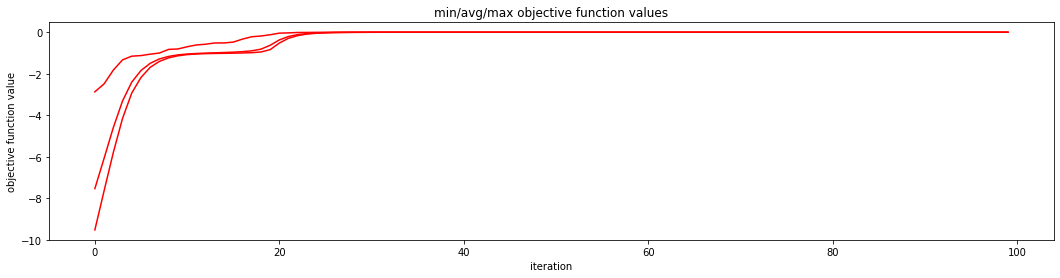

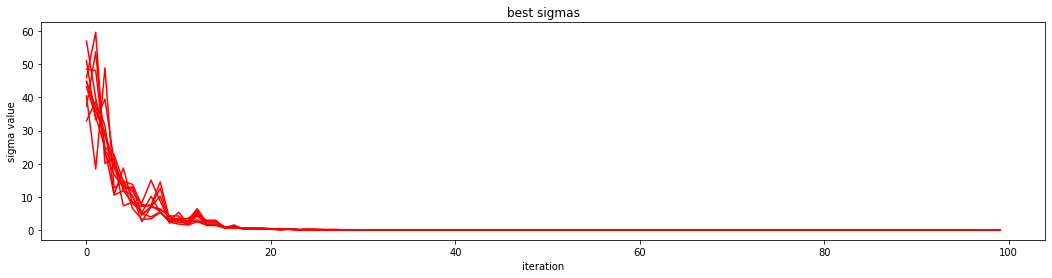

In [27]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Szymon Kiczak

Zadanie 1.

In [28]:
def plothistory( history_objective_values, history_best_sigmas ):
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7_lim(X):
    mx = np.max(X)
    mn = np.min(X)
    if mn < -500 or mx > 500:
        return - max( mx, abs(mn) ) * 100
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [29]:
def esfordifferentparams(obj_func, differentds, differentNs, differentTs):
    for d in differentds:
        for N in differentNs:
            for T in differentTs:
                best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(obj_func, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 100)
                print(f"plots for d (dimensions): {d}, N (population size): {N}, T (iterations): {T}, best obj value: {best_objective_value}")
                plothistory( history_objective_values, history_best_sigmas )

================================================== SPHERIC FUNCTION ==================================================
Iteration 0000 : best score = -6887.78966142, mean score = -25825.24386861.
plots for d (dimensions): 10, N (population size): 500, T (iterations): 100, best obj value: -8.797985320255585e-22


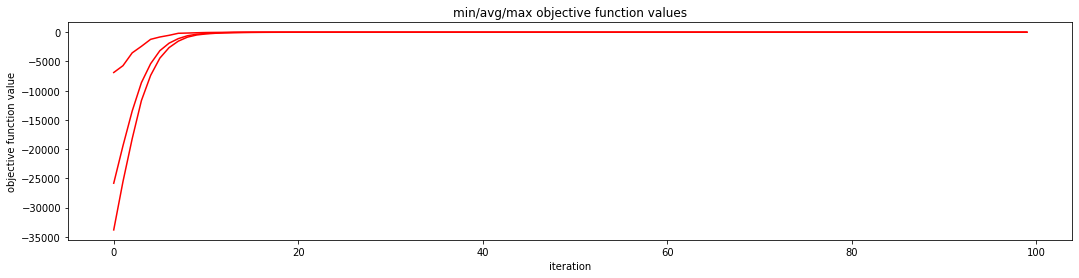

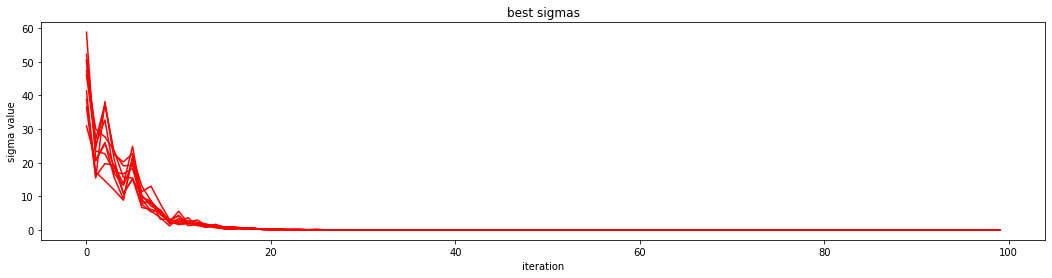

Iteration 0000 : best score = -7227.65936879, mean score = -26039.73809215.
plots for d (dimensions): 10, N (population size): 1000, T (iterations): 100, best obj value: -3.371427602135876e-23


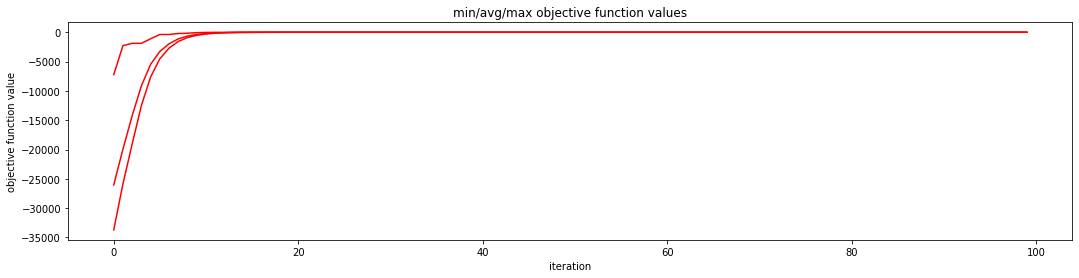

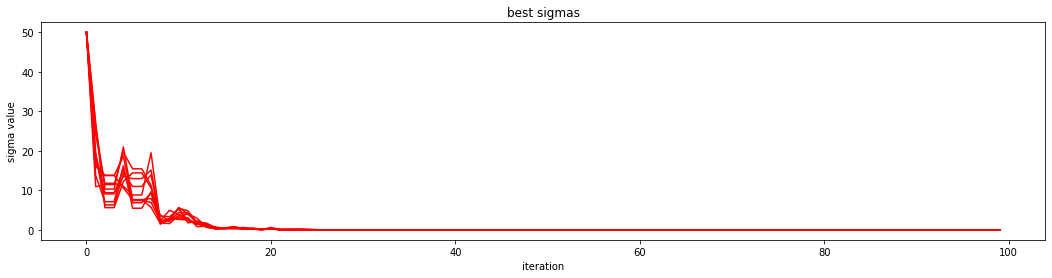

Iteration 0000 : best score = -27635.34992618, mean score = -60441.79886028.
plots for d (dimensions): 20, N (population size): 500, T (iterations): 100, best obj value: -5.429140102083812e-11


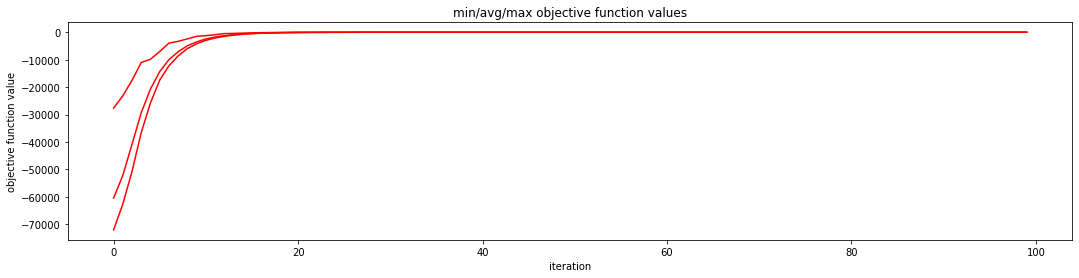

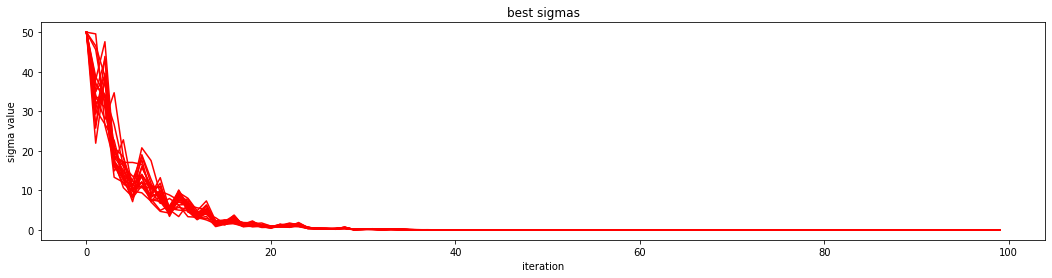

Iteration 0000 : best score = -27497.81426844, mean score = -59416.64851473.
plots for d (dimensions): 20, N (population size): 1000, T (iterations): 100, best obj value: -2.625295602036279e-11


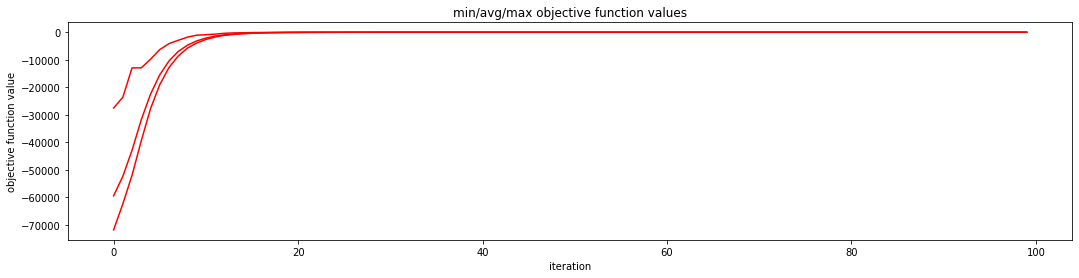

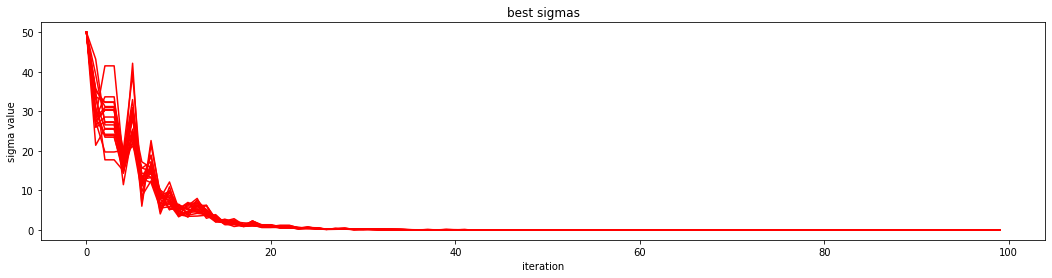

Iteration 0000 : best score = -96566.70371863, mean score = -159523.93269404.
plots for d (dimensions): 50, N (population size): 500, T (iterations): 100, best obj value: -0.16400564379620058


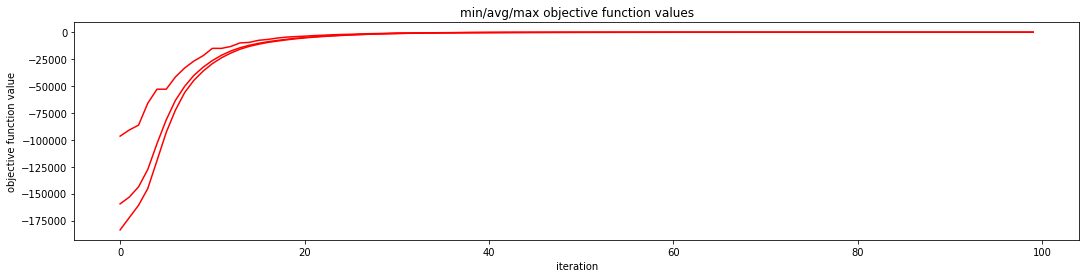

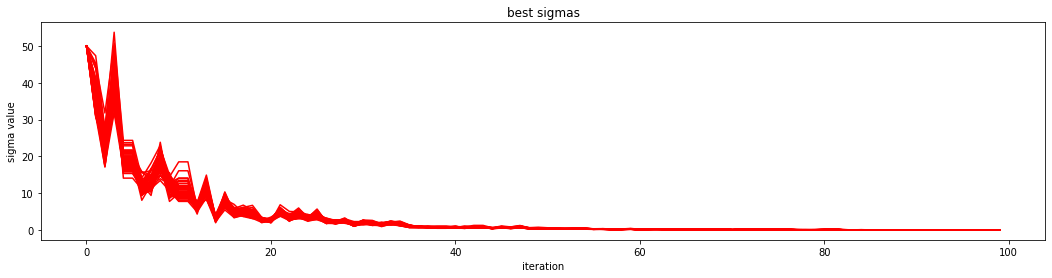

Iteration 0000 : best score = -91987.62659030, mean score = -161099.00994384.
plots for d (dimensions): 50, N (population size): 1000, T (iterations): 100, best obj value: -0.06265995874012828


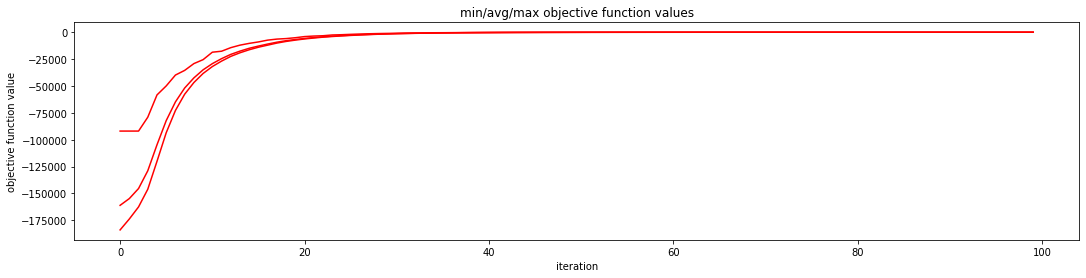

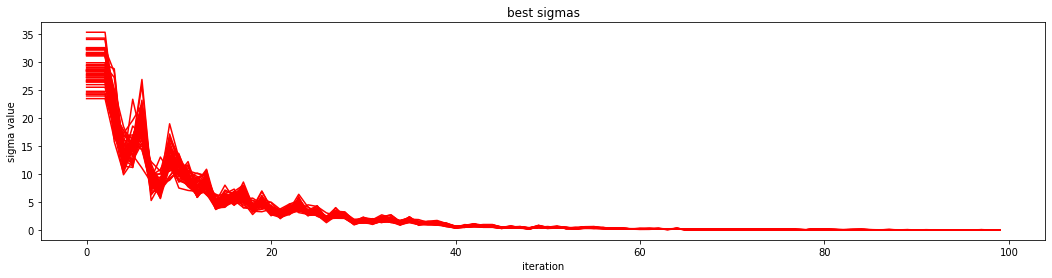

Iteration 0000 : best score = -257577.45854026, mean score = -328760.76710635.
plots for d (dimensions): 100, N (population size): 500, T (iterations): 100, best obj value: -201.61665569124395


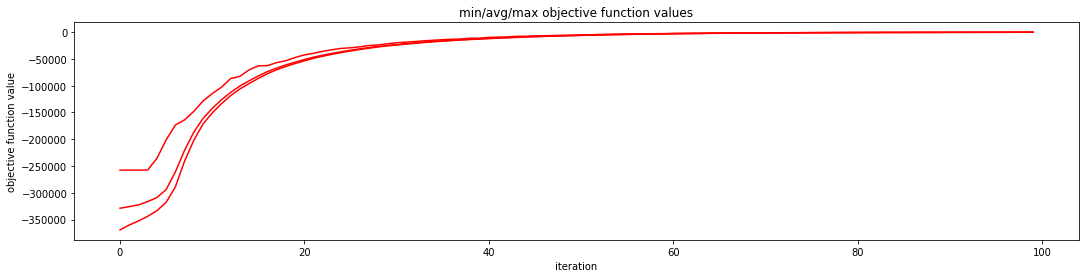

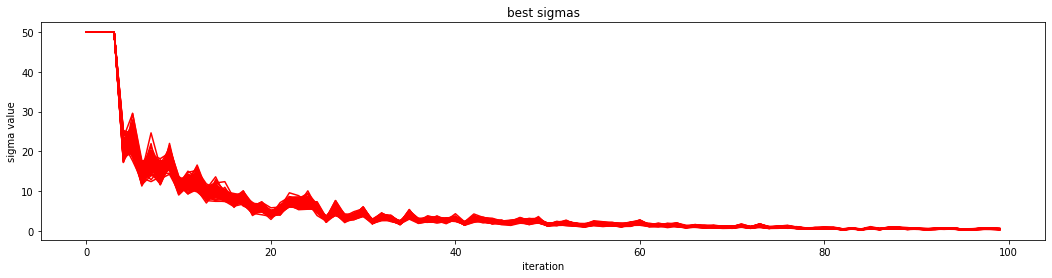

Iteration 0000 : best score = -228393.04765426, mean score = -329667.25615482.
plots for d (dimensions): 100, N (population size): 1000, T (iterations): 100, best obj value: -188.42126494317614


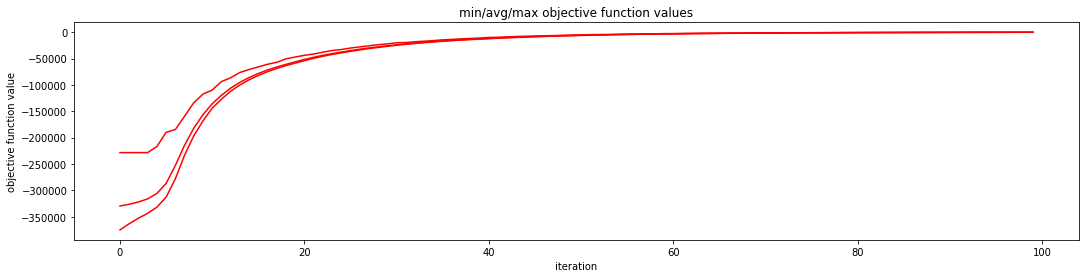

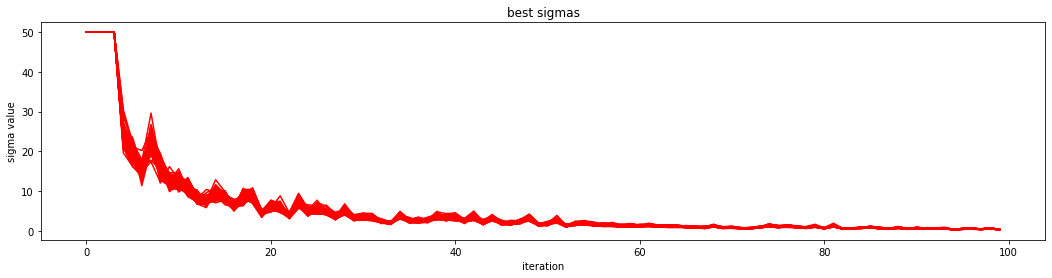

================================================== RASTRIGIN FUNCTION ==================================================
Iteration 0000 : best score = -5224.51443926, mean score = -26366.80095655.
plots for d (dimensions): 10, N (population size): 500, T (iterations): 100, best obj value: -2.984881268740054


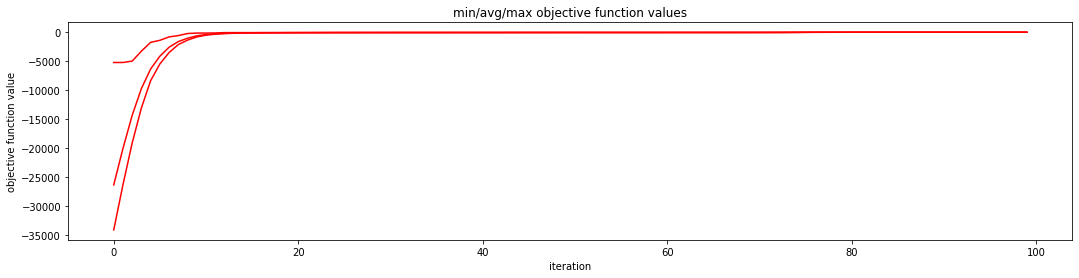

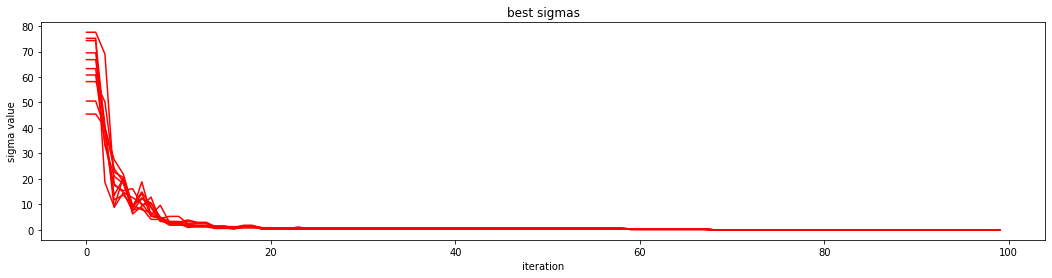

Iteration 0000 : best score = -5866.09384030, mean score = -26582.86991167.
plots for d (dimensions): 10, N (population size): 1000, T (iterations): 100, best obj value: -0.9949590571141016


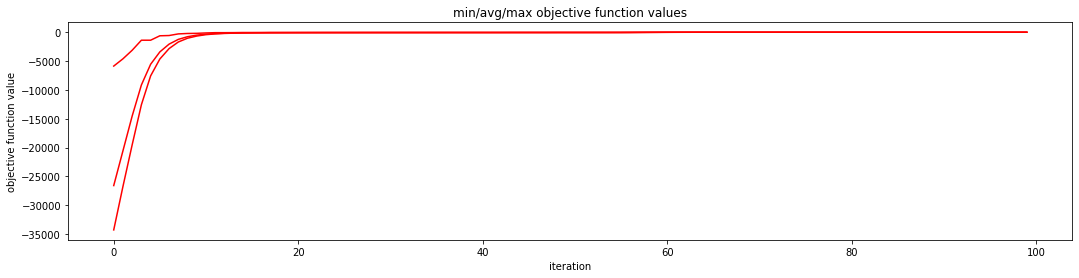

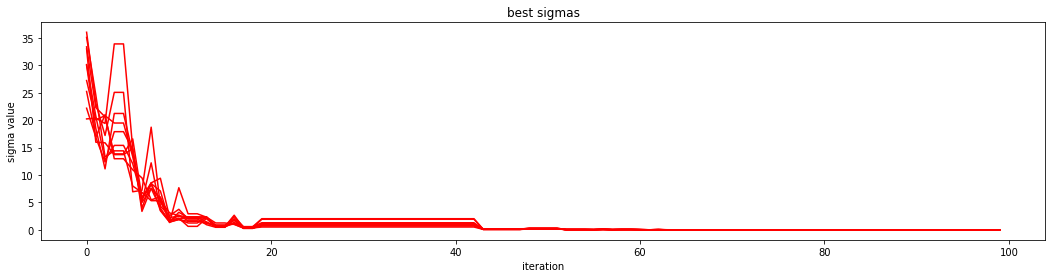

Iteration 0000 : best score = -23459.89964614, mean score = -60454.18576709.
plots for d (dimensions): 20, N (population size): 500, T (iterations): 100, best obj value: -14.924453420788012


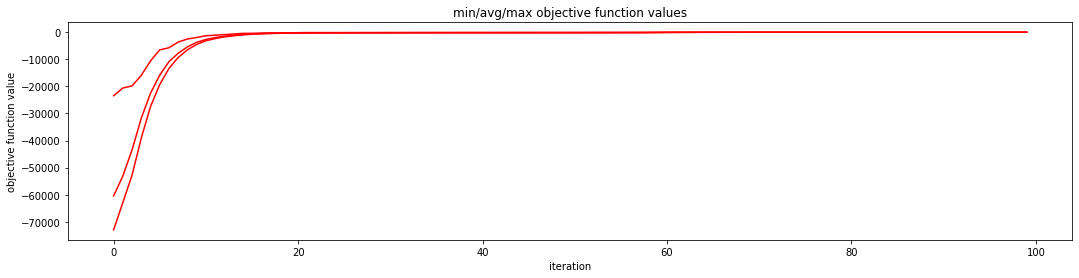

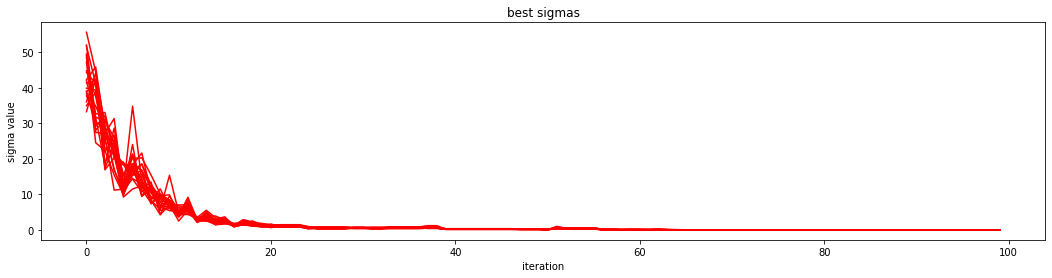

Iteration 0000 : best score = -26674.50329255, mean score = -59623.11814039.
plots for d (dimensions): 20, N (population size): 1000, T (iterations): 100, best obj value: -13.929439719185353


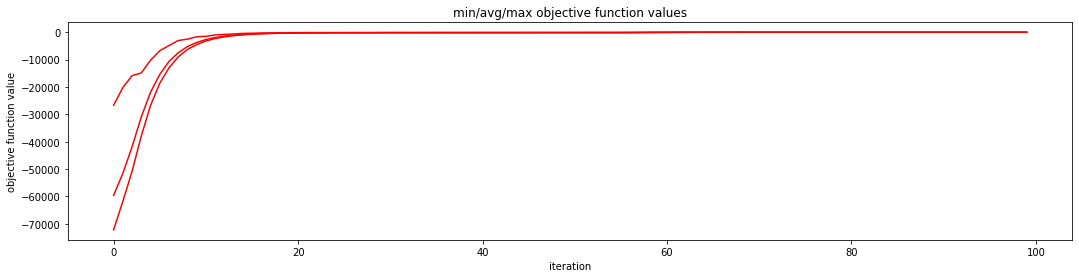

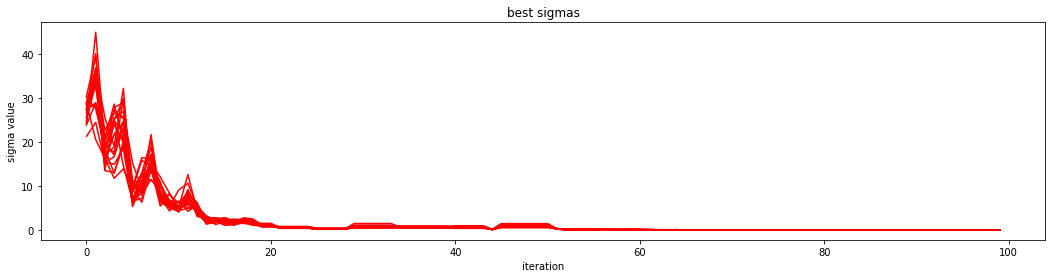

Iteration 0000 : best score = -103131.49575894, mean score = -161401.71193086.
plots for d (dimensions): 50, N (population size): 500, T (iterations): 100, best obj value: -155.6682943828377


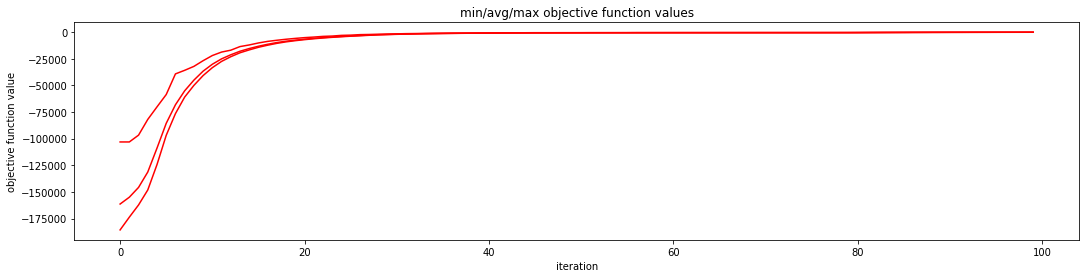

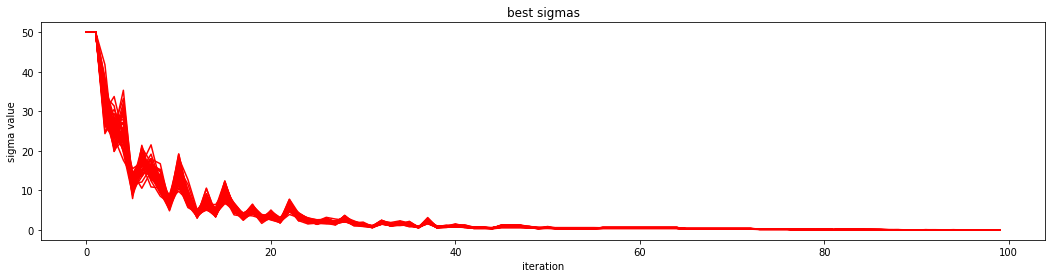

Iteration 0000 : best score = -92862.88033578, mean score = -160998.60313241.
plots for d (dimensions): 50, N (population size): 1000, T (iterations): 100, best obj value: -206.6509793230499


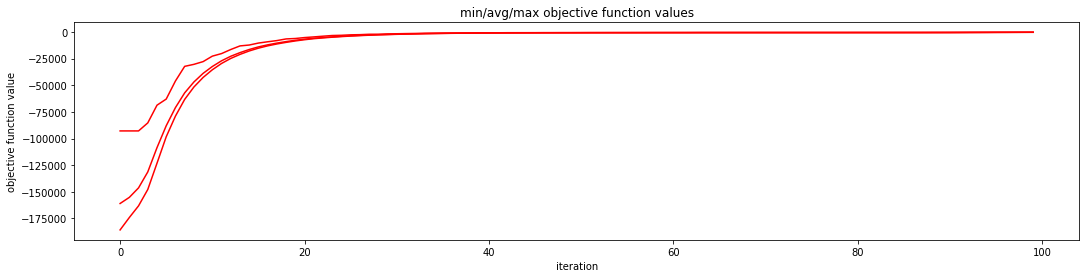

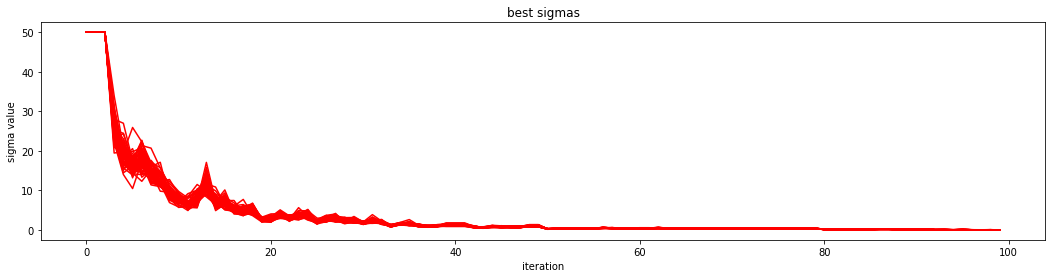

Iteration 0000 : best score = -236788.81373210, mean score = -330103.73583151.
plots for d (dimensions): 100, N (population size): 500, T (iterations): 100, best obj value: -1359.1706775043199


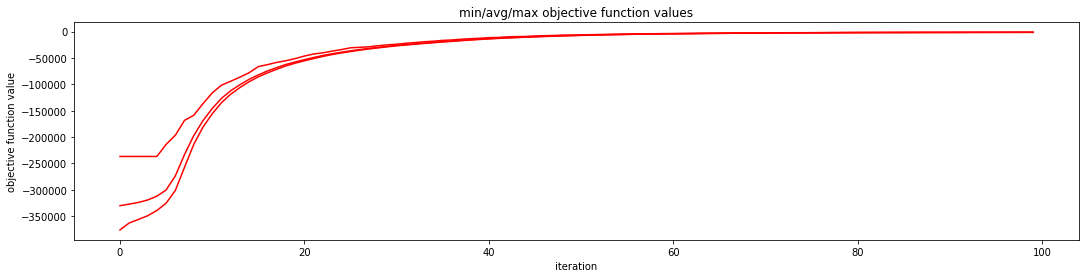

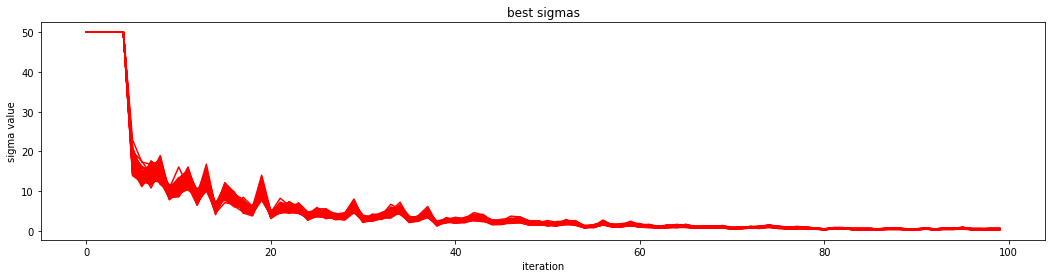

Iteration 0000 : best score = -245059.28390652, mean score = -329552.67501786.
plots for d (dimensions): 100, N (population size): 1000, T (iterations): 100, best obj value: -1379.6777010813623


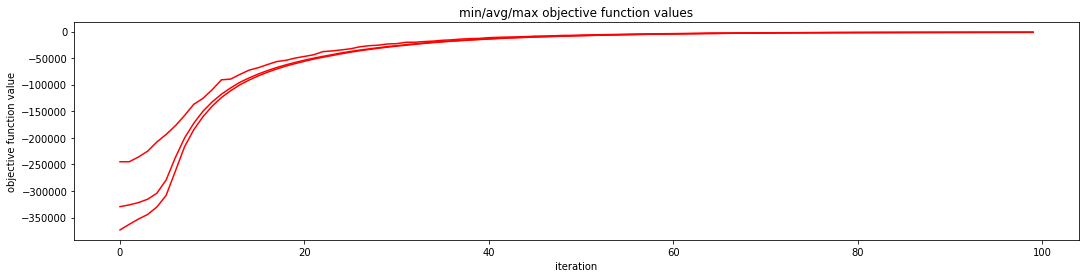

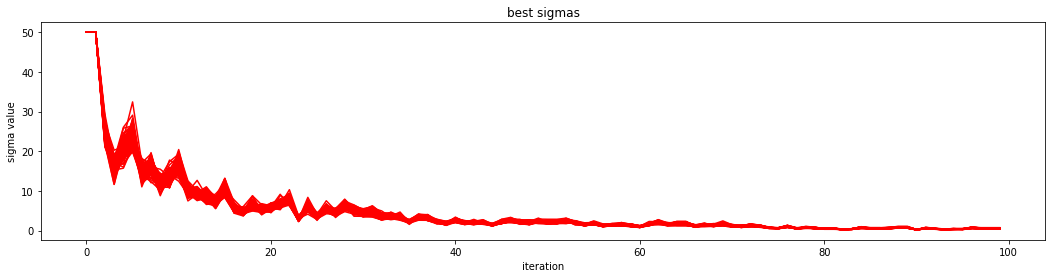

================================================== SCHWEFEL FUNCTION ==================================================
Iteration 0000 : best score = -3763.19435401, mean score = -4065.67122912.
Iteration 0100 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0200 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0300 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0400 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0500 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0600 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0700 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0800 : best score = -3504.86739762, mean score = -3970.72780757.
Iteration 0900 : best score = -3504.86739762, mean score = -3970.72780757.
plots for d (dimensions): 10, N (population size): 1500, T (iterations): 1000, best obj value: -3504.867397622105


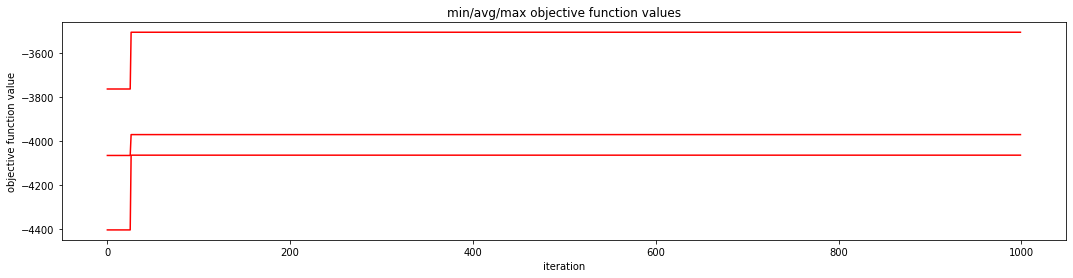

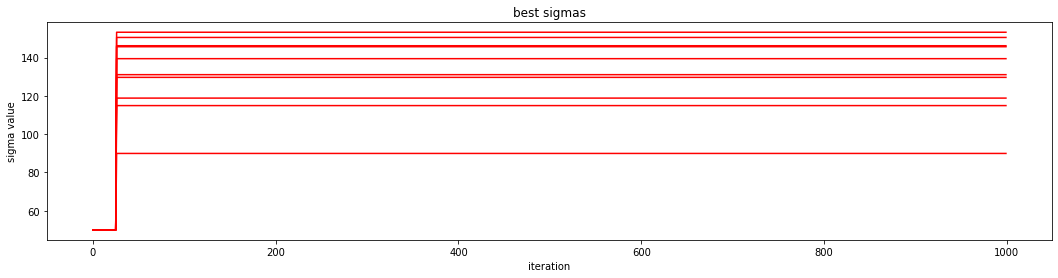

Iteration 0000 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0100 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0200 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0300 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0400 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0500 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0600 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0700 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0800 : best score = -7349.84775969, mean score = -8036.62132879.
Iteration 0900 : best score = -7349.84775969, mean score = -8036.62132879.
plots for d (dimensions): 20, N (population size): 1500, T (iterations): 1000, best obj value: -7349.847759693434


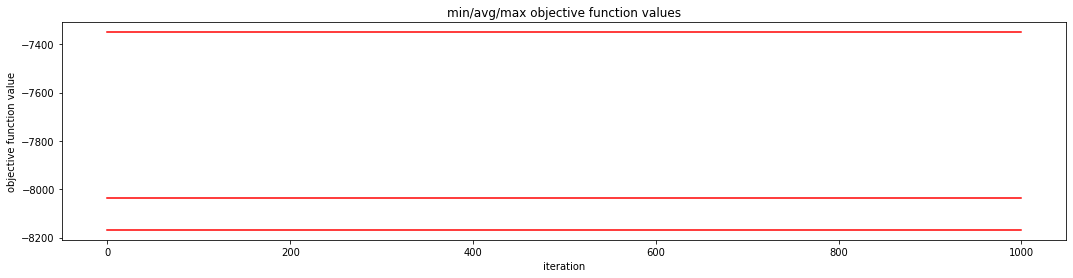

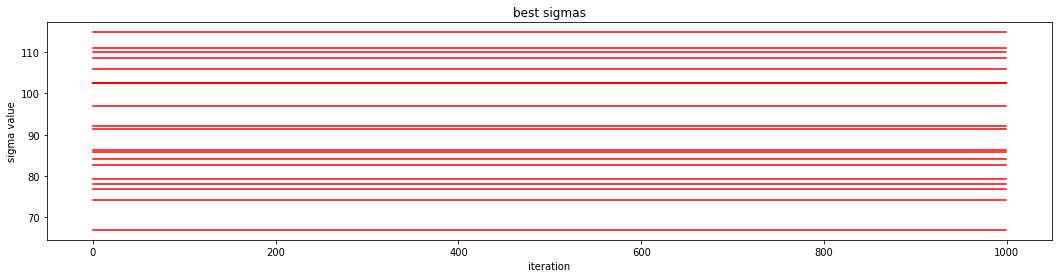

Iteration 0000 : best score = -19500.80821054, mean score = -20247.37558522.
Iteration 0100 : best score = -18946.86108778, mean score = -20172.25085220.
Iteration 0200 : best score = -18946.86108778, mean score = -20172.25085220.
Iteration 0300 : best score = -18946.86108778, mean score = -20135.32531802.
Iteration 0400 : best score = -18946.86108778, mean score = -20135.32531802.
Iteration 0500 : best score = -18946.86108778, mean score = -20135.32531802.
Iteration 0600 : best score = -18946.86108778, mean score = -20135.32531802.
Iteration 0700 : best score = -18946.86108778, mean score = -20135.32531802.
Iteration 0800 : best score = -18946.86108778, mean score = -20135.32531802.
Iteration 0900 : best score = -18946.86108778, mean score = -20135.32531802.
plots for d (dimensions): 50, N (population size): 1500, T (iterations): 1000, best obj value: -18946.861087779624


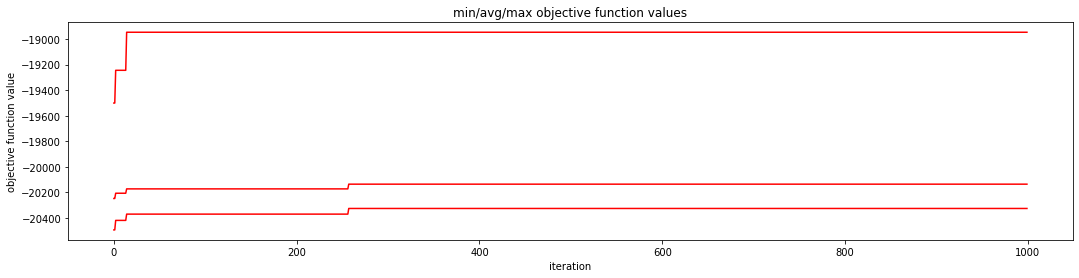

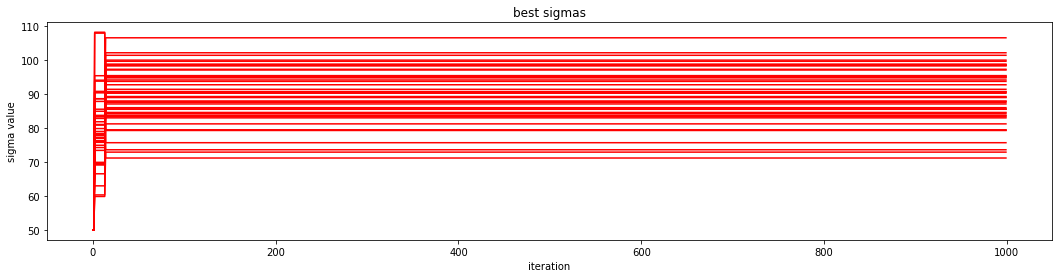

Iteration 0000 : best score = -39624.44151573, mean score = -40605.43230091.
Iteration 0100 : best score = -39013.96858388, mean score = -40439.07702728.
Iteration 0200 : best score = -39013.96858388, mean score = -40439.07702728.
Iteration 0300 : best score = -39013.96858388, mean score = -40439.07702728.
Iteration 0400 : best score = -39013.96858388, mean score = -40439.07702728.
Iteration 0500 : best score = -39013.96858388, mean score = -40419.33054769.
Iteration 0600 : best score = -39013.96858388, mean score = -40419.33054769.
Iteration 0700 : best score = -39013.96858388, mean score = -40419.33054769.
Iteration 0800 : best score = -39013.96858388, mean score = -40419.33054769.
Iteration 0900 : best score = -39013.96858388, mean score = -40419.33054769.
plots for d (dimensions): 100, N (population size): 1500, T (iterations): 1000, best obj value: -39013.968583884955


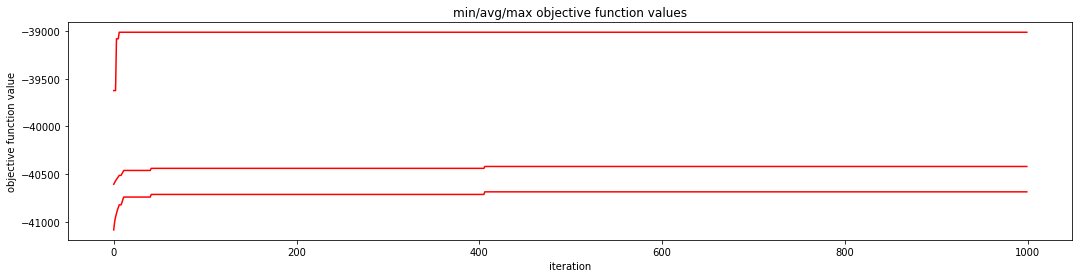

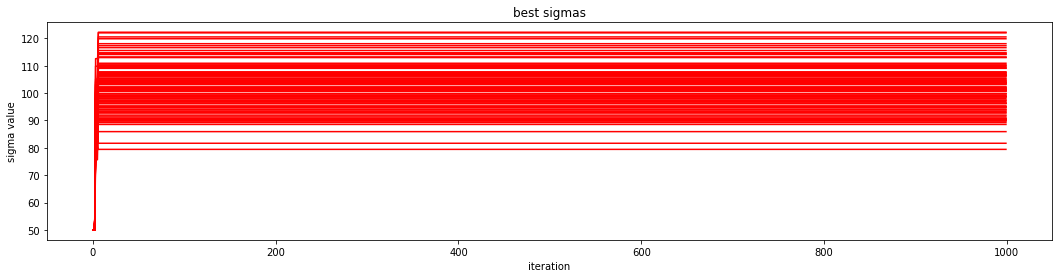

================================================== GRIEWANK FUNCTION ==================================================
Iteration 0000 : best score = -3.33374668, mean score = -7.60710087.
plots for d (dimensions): 10, N (population size): 500, T (iterations): 100, best obj value: -0.00985728460782076


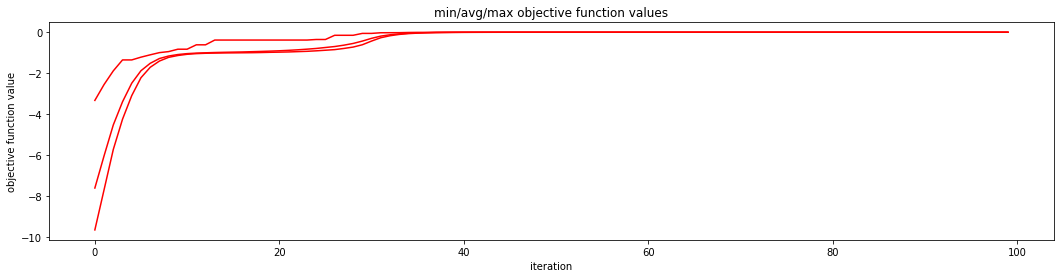

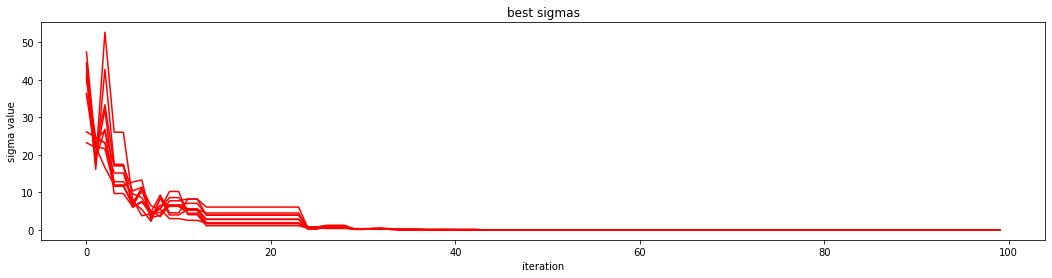

Iteration 0000 : best score = -2.98979684, mean score = -7.55625138.
plots for d (dimensions): 10, N (population size): 1000, T (iterations): 100, best obj value: 0.0


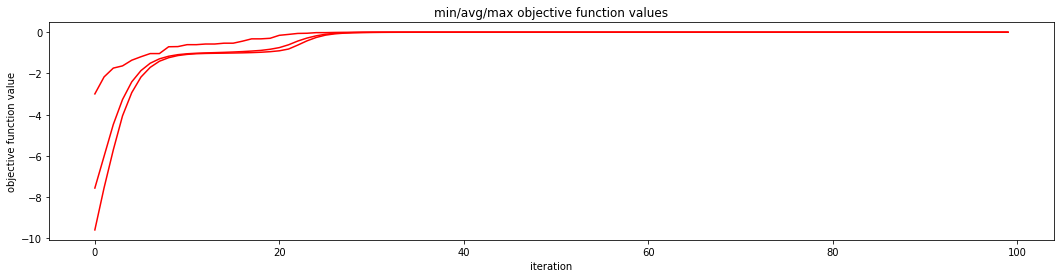

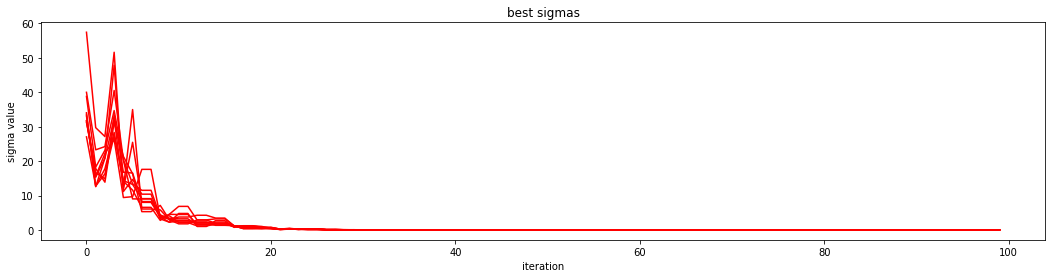

Iteration 0000 : best score = -7.76480785, mean score = -16.07316321.
plots for d (dimensions): 20, N (population size): 500, T (iterations): 100, best obj value: -2.1339856548507896e-09


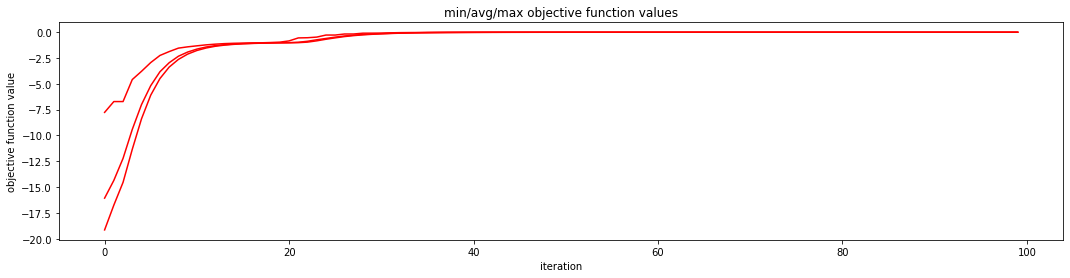

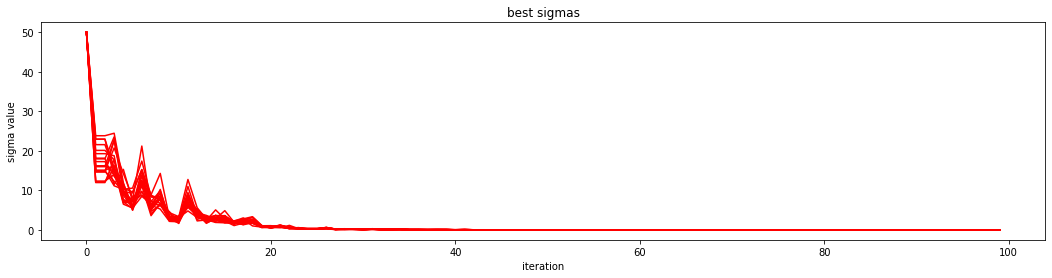

Iteration 0000 : best score = -5.33823630, mean score = -15.61466480.
plots for d (dimensions): 20, N (population size): 1000, T (iterations): 100, best obj value: -8.371476845070447e-10


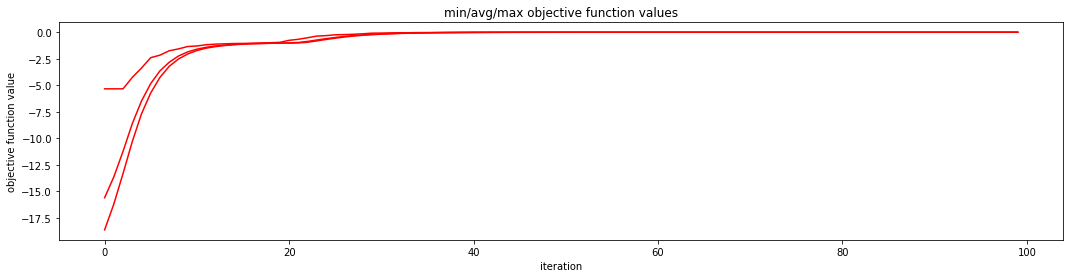

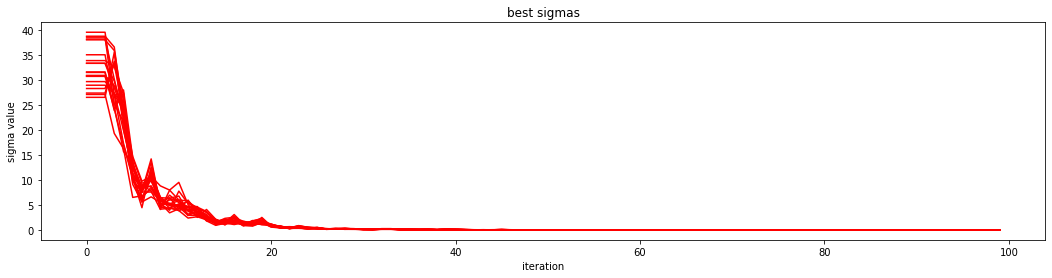

Iteration 0000 : best score = -22.82687367, mean score = -41.08027434.
plots for d (dimensions): 50, N (population size): 500, T (iterations): 100, best obj value: -0.06297311375595838


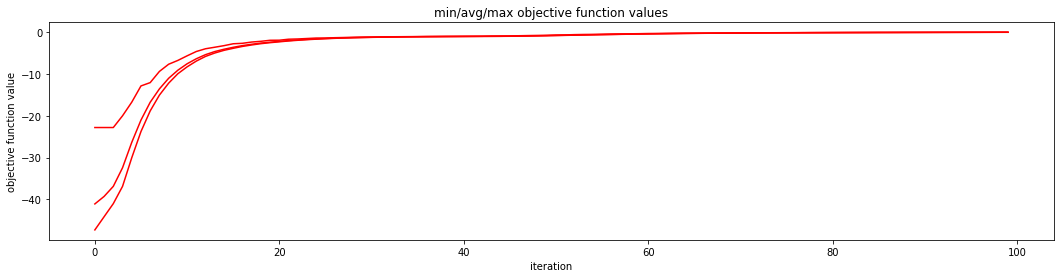

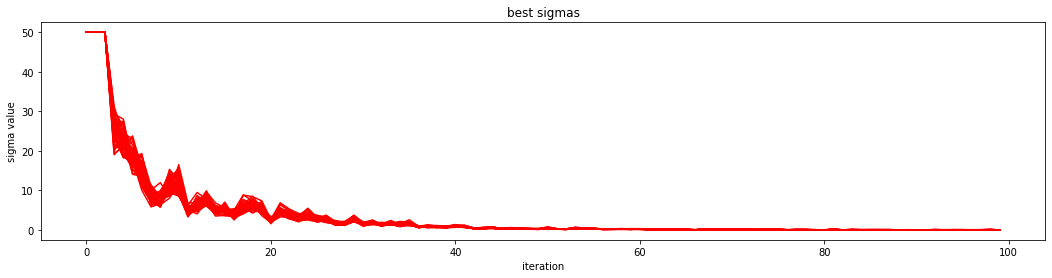

Iteration 0000 : best score = -24.32377531, mean score = -41.14410504.
plots for d (dimensions): 50, N (population size): 1000, T (iterations): 100, best obj value: -0.042212423414677014


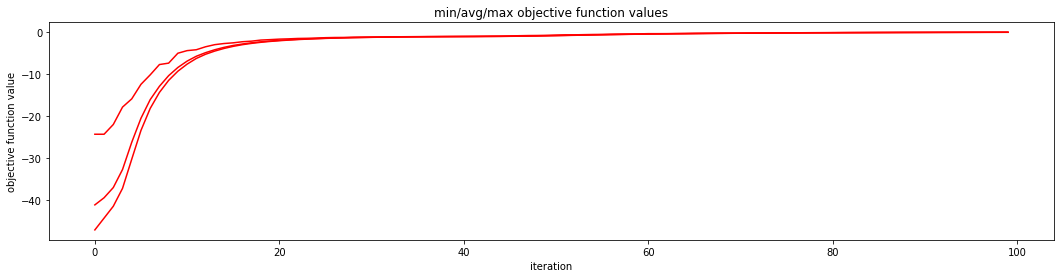

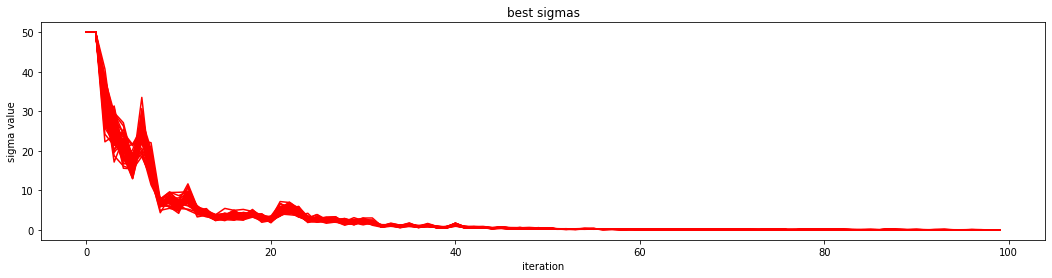

Iteration 0000 : best score = -63.31097712, mean score = -83.85673470.
plots for d (dimensions): 100, N (population size): 500, T (iterations): 100, best obj value: -0.9641798969047226


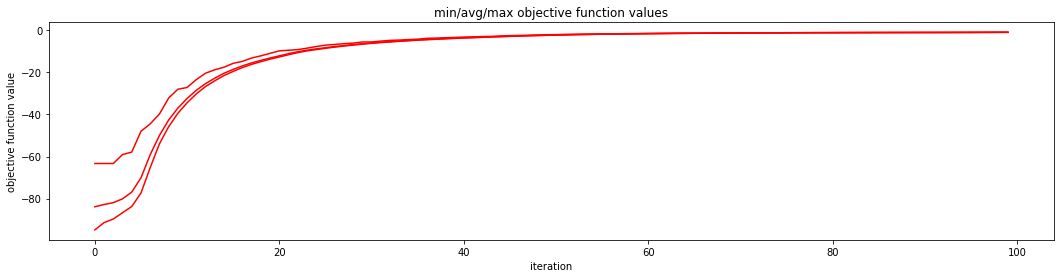

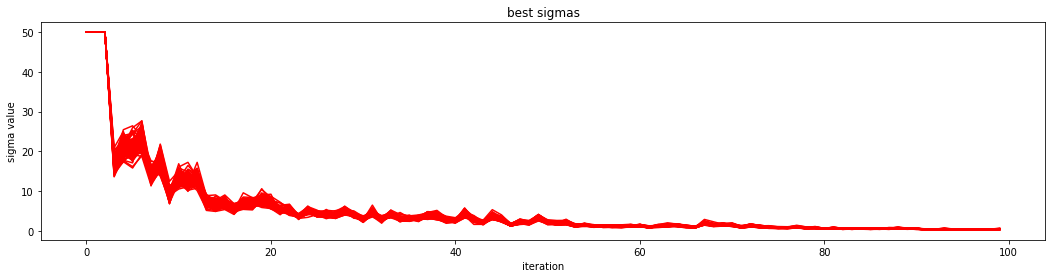

Iteration 0000 : best score = -61.52758664, mean score = -83.45347188.
plots for d (dimensions): 100, N (population size): 1000, T (iterations): 100, best obj value: -1.0061972962794559


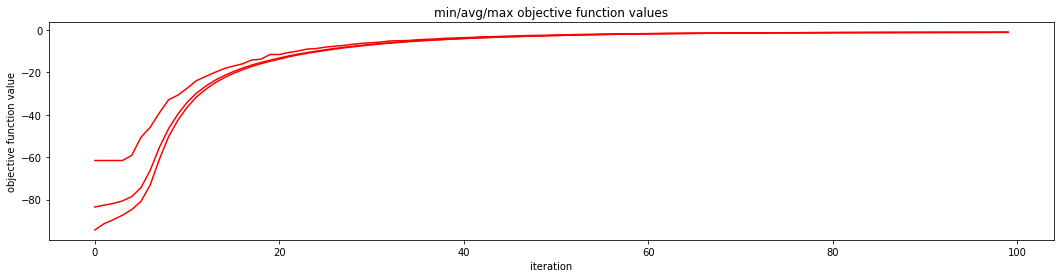

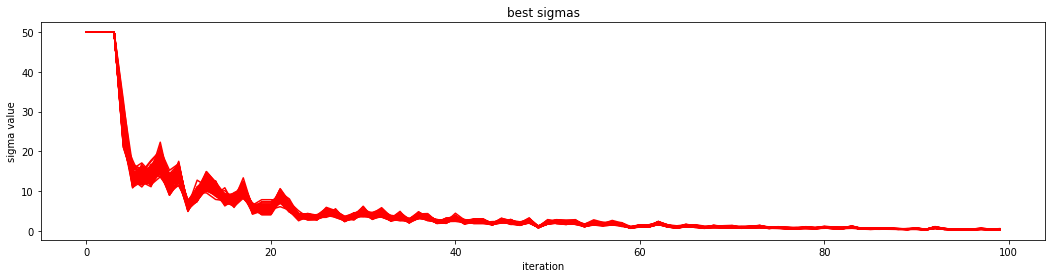

In [31]:
#esfordifferentparams(objective_function_F1, [10, 20, 50, 100], [500, 1000, 1500], [100, 200] )

print("================================================== SPHERIC FUNCTION ==================================================")
esfordifferentparams(objective_function_F1, [10, 20, 50, 100], [500, 1000], [100] )
print("================================================== RASTRIGIN FUNCTION ==================================================")
esfordifferentparams(objective_function_F6, [10, 20, 50, 100], [500, 1000], [100] )
print("================================================== SCHWEFEL FUNCTION ==================================================")
esfordifferentparams(objective_function_F7_lim, [10, 20, 50, 100], [1500], [1000] )
print("================================================== GRIEWANK FUNCTION ==================================================")
esfordifferentparams(objective_function_F8, [10, 20, 50, 100], [500, 1000], [100] )

Zadanie 2.

In [306]:
def mutation1(N, d, original_individual, sigma = 0.25):
    mutations = original_individual + sigma * np.random.randn(N, d)
    return mutations

def mutation2(N, d, original_individual, sigma = np.array([0.25, 0.5])):
    mutations = original_individual + sigma * np.random.randn(N, d)
    return mutations

def mutation3(N, d, original_individual, S = np.array([[0.25, 0.25],[0.25, 0.5]])):
    mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)
    return mutations

def how_many_better(original_individual, objfunc, mutations):
    original_individual_result = objfunc( original_individual )
    res = 0
    for r in objfunc( mutations ):
        if r > original_individual_result:
            res += 1
    return res

def average_better(N, d, original_individual, objfunc, mutationfunc, iterations=100):
    results = np.zeros( iterations )
    for i in range( iterations ):
        mutations = mutationfunc( N, d, original_individual )
        results[i] = how_many_better(original_individual, objfunc, mutations )
    return np.mean(results)

def average_best_result(N, d, original_individual, objfunc, mutationfunc, iterations=100):
    results = np.zeros( iterations )
    for i in range(iterations):
        mutations = mutationfunc( N, d, original_individual )
        results[i] = np.sort( objfunc( mutations) )[::-1][0]
    return np.mean(results)

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def myellipse(oind, cov, ax, n_std=2.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = oind[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = oind[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def plot_ovals1(objective_function, original_individual, mutations):
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    fig, ax = plt.subplots(figsize=(9, 9))
    ax.contour(X, Y, Z, 50)
    ax.plot(mutations[:, 0], mutations[:, 1], 'ro')
    ax.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    confidence_ellipse(mutations[:, 0], mutations[:, 1], ax, n_std=2.0, edgecolor='blue')
    #myellipse(original_individual[0], np.array([[0.25, 0],[0, 0.25]]), ax)
    ax.set_title('Mutation 1')
    plt.show()

def plot_ovals2(objective_function, original_individual, mutations):
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    fig, ax = plt.subplots(figsize=(9, 9))
    ax.contour(X, Y, Z, 50)
    ax.plot(mutations[:, 0], mutations[:, 1], 'ro')
    ax.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    confidence_ellipse(mutations[:, 0], mutations[:, 1], ax, n_std=2.0, edgecolor='blue')
    #myellipse(original_individual[0], np.array([[0.25, 0],[0, 0.25]]), ax)
    ax.set_title('Mutation 2')
    plt.show()

def plot_ovals3(objective_function, original_individual, mutations):
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    fig, ax = plt.subplots(figsize=(9, 9))
    ax.contour(X, Y, Z, 50)
    ax.plot(mutations[:, 0], mutations[:, 1], 'ro')
    ax.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    confidence_ellipse(mutations[:, 0], mutations[:, 1], ax, n_std=2.0, edgecolor='blue')
    #myellipse(original_individual[0], np.array([[0.25, 0.25],[0.25, 0.5]]), ax, edgecolor='blue')
    ax.set_title('Mutation 3')
    plt.show()

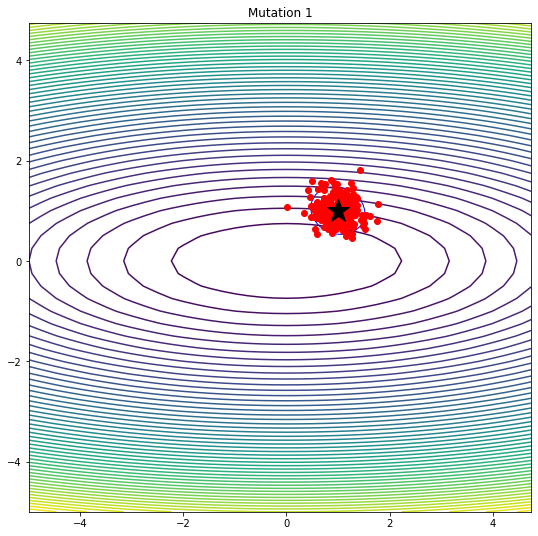

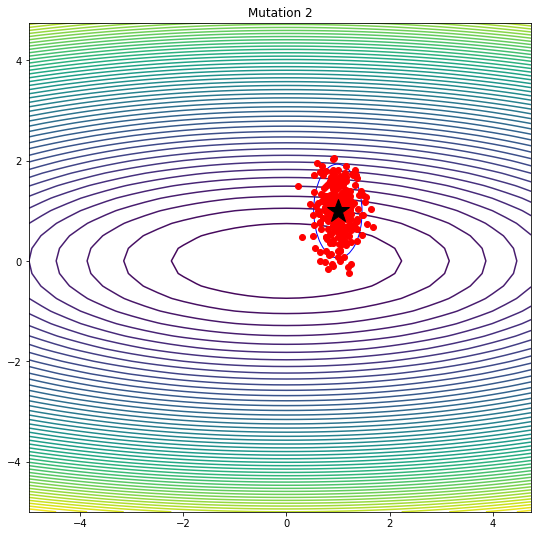

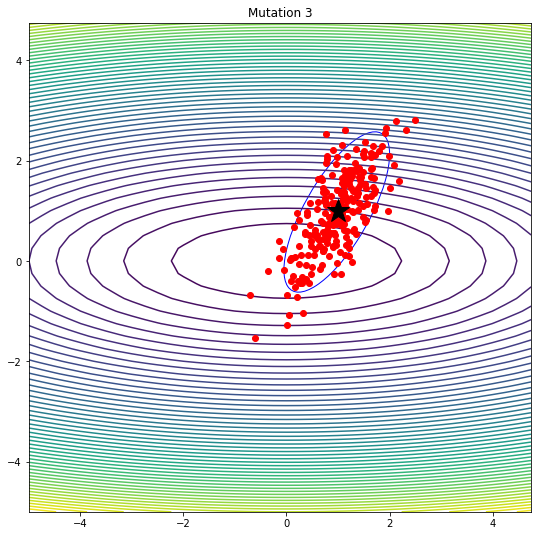

testing mutations for sphere function:
original individual result:  [-10]
mean better individuals from mutation 1: 122.46, 48.984%
mean best result from offspring from mutation 1: -1.8211153660104404
mean better individuals from mutation 2: 124.09, 49.636%
mean best result from offspring from mutation 2: -0.4704331094319526
mean better individuals from mutation 3: 123.4, 49.36000000000001%
mean best result from offspring from mutation 3: -0.49652459402816773
testing mutations for rastrigin function:
original individual result:  [-2.]
mean better individuals from mutation 1: 0.06, 0.023999999999999997%
mean best result from offspring from mutation 1: -2.107430911143363
mean better individuals from mutation 2: 0.62, 0.248%
mean best result from offspring from mutation 2: -1.8622664429557279
mean better individuals from mutation 3: 1.14, 0.45599999999999996%
mean best result from offspring from mutation 3: -1.7741661586908812
testing mutations for schwefel function:
original individual re

In [309]:
def test_mutations( testfunction ):
    oind = np.array([[1, 1]])

    N=250
    d=2

    print(f"original individual result: ", testfunction( oind ) )

    av1 = average_better( N, d, oind, testfunction, mutation1 )
    print(f"mean better individuals from mutation 1: {av1}, {av1/N * 100}%" )
    print(f"mean best result from offspring from mutation 1: {average_best_result( N, d, oind, testfunction, mutation1 )}")
    #plot_ovals1(testfunction, oind, mutation1(N, d, oind) )

    av2 = average_better( N, d, oind, testfunction, mutation2 )
    print(f"mean better individuals from mutation 2: {av2}, {av2/N * 100}%" )
    print(f"mean best result from offspring from mutation 2: {average_best_result( N, d, oind, testfunction, mutation2 )}")
    #plot_ovals2(testfunction, oind, mutation2(N, d, oind) )

    av3 = average_better( N, d, oind, testfunction, mutation3 )
    print(f"mean better individuals from mutation 3: {av3}, {av3/N * 100}%" )
    print(f"mean best result from offspring from mutation 3: {average_best_result( N, d, oind, testfunction, mutation2 )}")
    #plot_ovals3(testfunction, oind, mutation3(N, d, oind) )

oind = np.array([[1, 1]])
N=250
d=2

plot_ovals1(objective_function_F1a, oind, mutation1(N, d, oind) )
plot_ovals2(objective_function_F1a, oind, mutation2(N, d, oind) )
plot_ovals3(objective_function_F1a, oind, mutation3(N, d, oind) )

print("testing mutations for sphere function:")
test_mutations(objective_function_F1a)
print("testing mutations for rastrigin function:")
test_mutations(objective_function_F6)
print("testing mutations for schwefel function:")
test_mutations(objective_function_F7)
print("testing mutations for griewank function:")
test_mutations(objective_function_F8)

Zadanie 3.

================================================== SPHERIC FUNCTION A ==================================================
Iteration 0000 : best score = -26.24408975, mean score = -6848.10246472.
plots for d (dimensions): 10, N (population size): 500, T (iterations): 100, best obj value: -3.71441432568846e-16


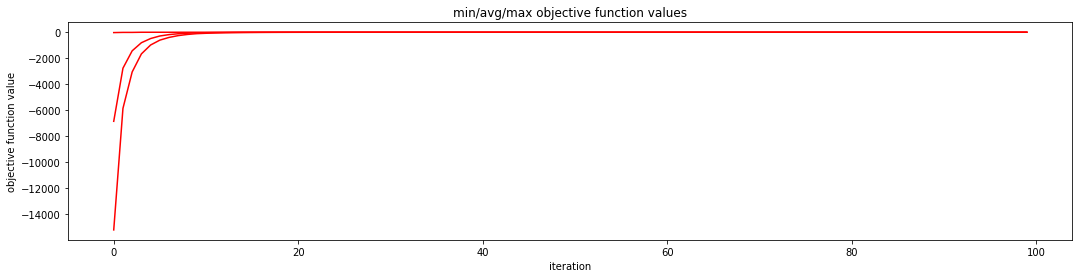

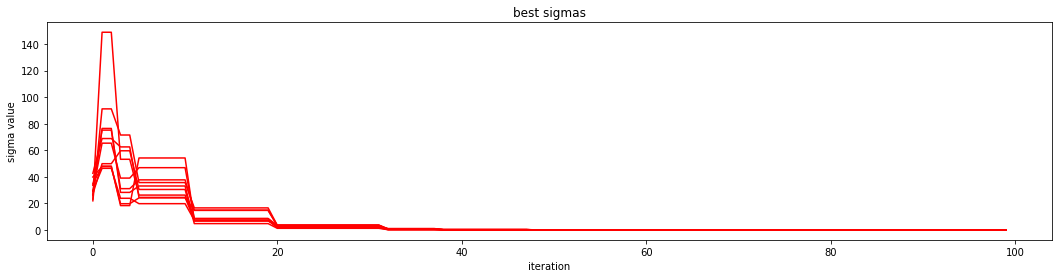

Iteration 0000 : best score = -5.68297905, mean score = -6730.39925046.
plots for d (dimensions): 20, N (population size): 500, T (iterations): 100, best obj value: -3.963159567590732e-10


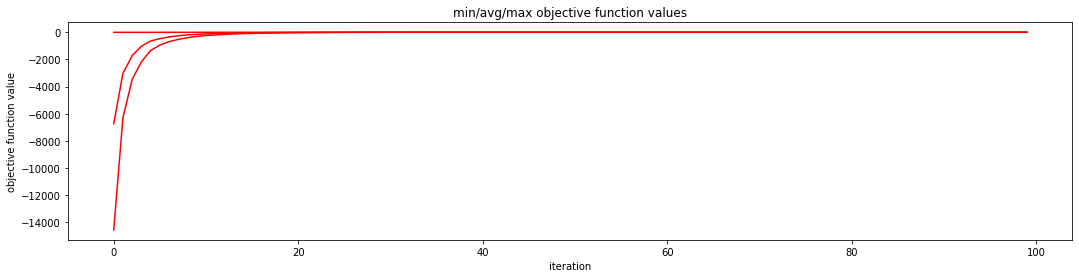

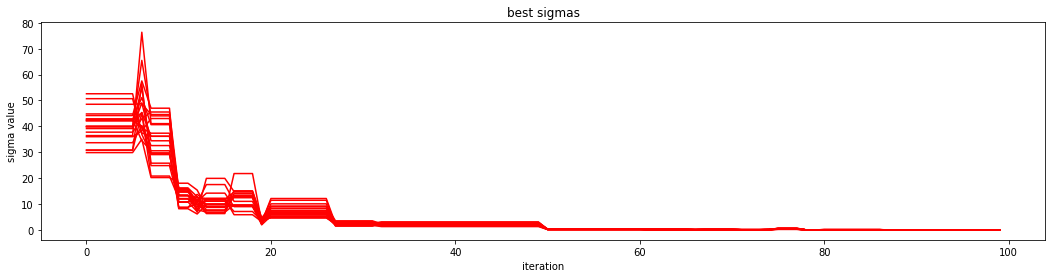

Iteration 0000 : best score = -6.27558521, mean score = -6152.89953518.
plots for d (dimensions): 50, N (population size): 500, T (iterations): 100, best obj value: -0.0026714264778021314


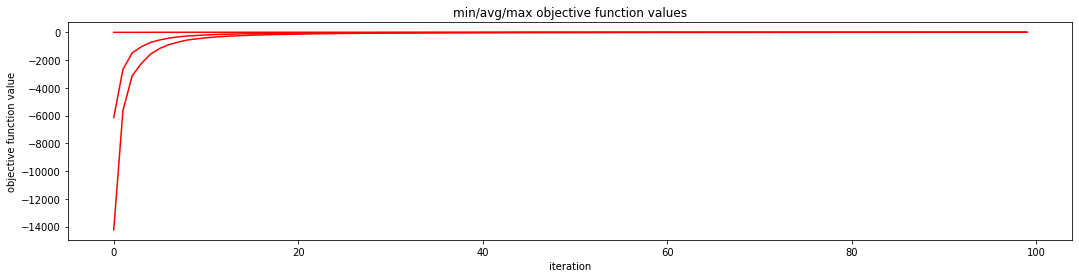

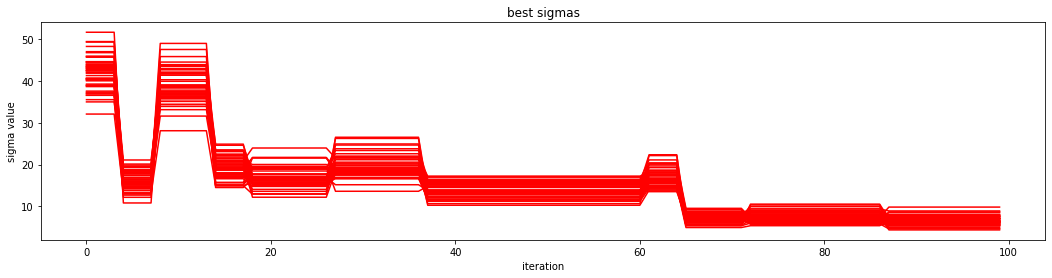

Iteration 0000 : best score = -9.68922196, mean score = -6307.49245813.
plots for d (dimensions): 100, N (population size): 500, T (iterations): 100, best obj value: -0.005771271985183575


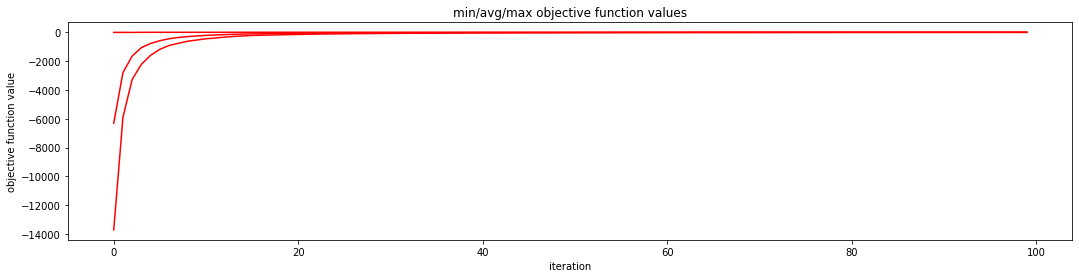

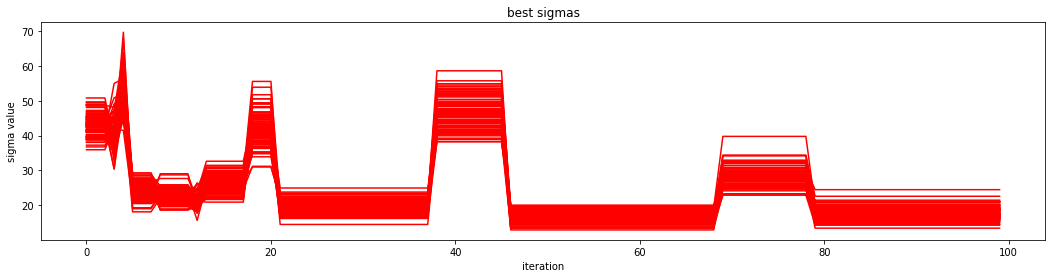

================================================== SPHERIC FUNCTION B ==================================================
Iteration 0000 : best score = -243.44140758, mean score = -250129.08084422.
plots for d (dimensions): 10, N (population size): 500, T (iterations): 100, best obj value: -4.701310427702355e-10


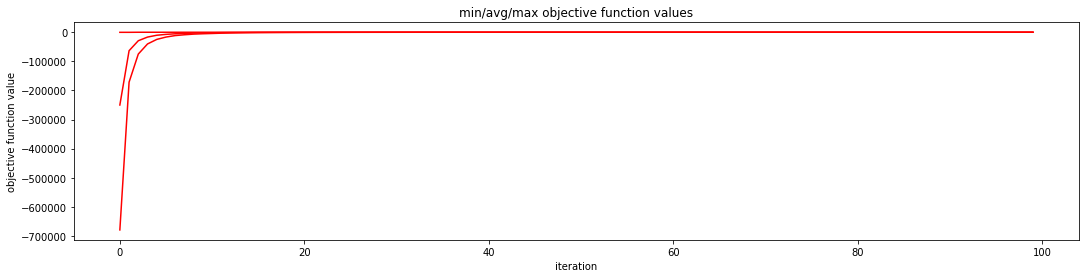

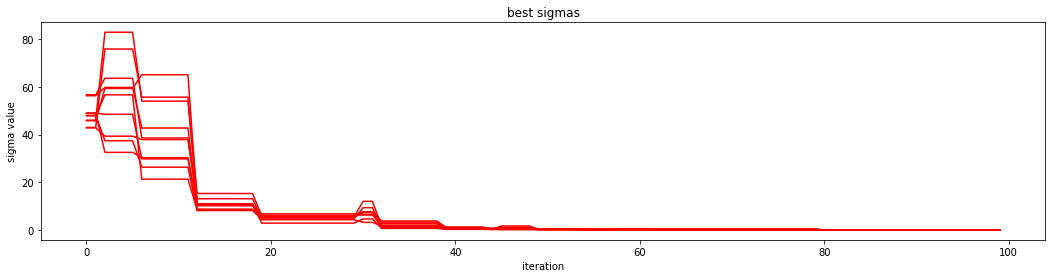

Iteration 0000 : best score = -235.50186572, mean score = -213963.50012526.
plots for d (dimensions): 20, N (population size): 500, T (iterations): 100, best obj value: -0.004515624375587314


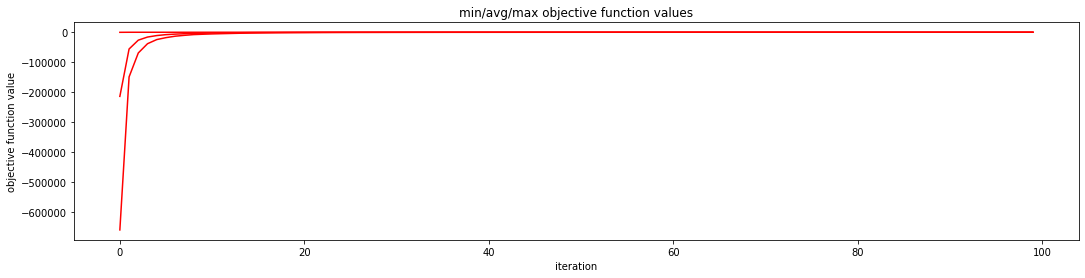

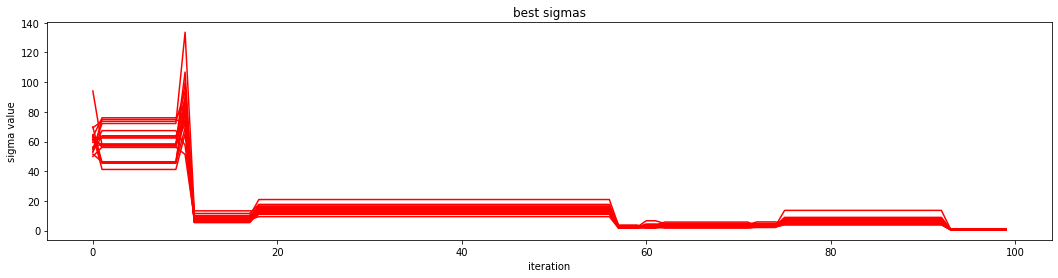

Iteration 0000 : best score = -131.23306367, mean score = -213927.25302657.
plots for d (dimensions): 50, N (population size): 500, T (iterations): 100, best obj value: -0.13887277063077252


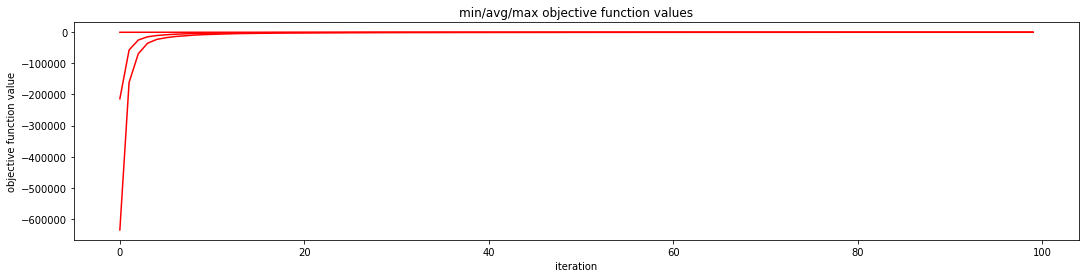

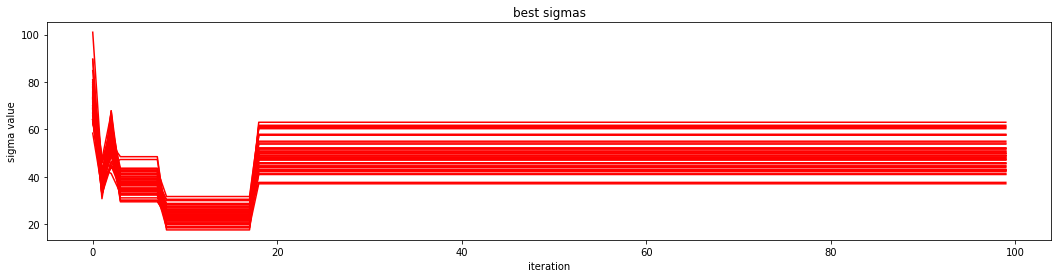

Iteration 0000 : best score = -30.82237300, mean score = -191441.68320111.
plots for d (dimensions): 100, N (population size): 500, T (iterations): 100, best obj value: -0.1042452354193451


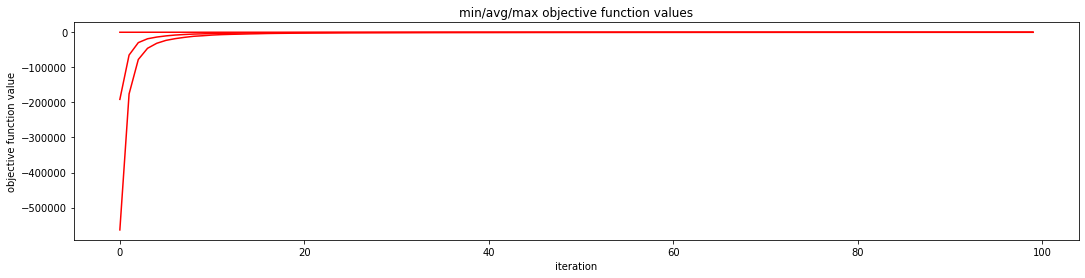

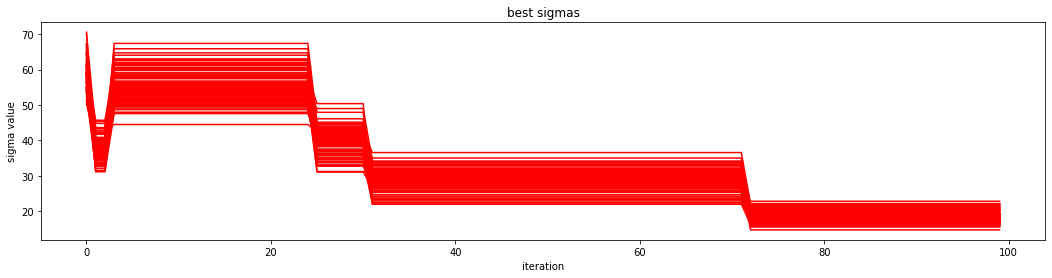

================================================== SPHERIC FUNCTION C ==================================================
Iteration 0000 : best score = -1.64685056, mean score = -1859.09175721.
plots for d (dimensions): 10, N (population size): 500, T (iterations): 100, best obj value: -8.28628164118508e-16


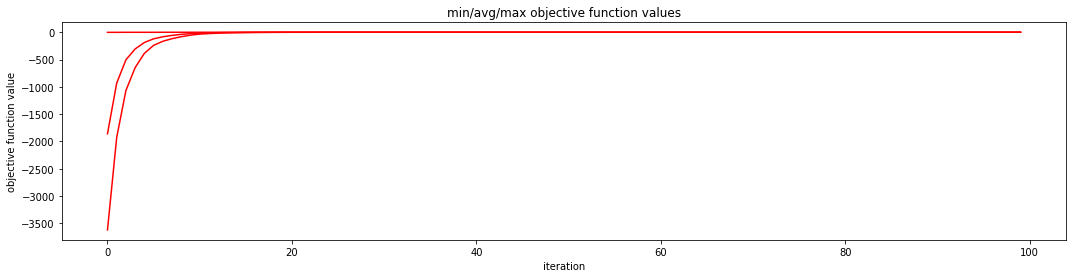

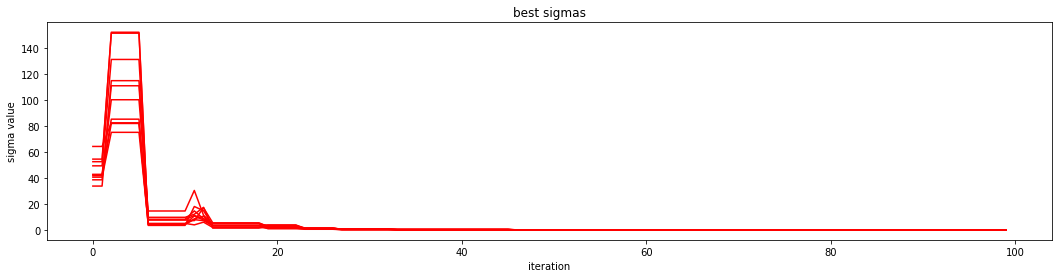

Iteration 0000 : best score = -2.90702800, mean score = -1894.43328935.
plots for d (dimensions): 20, N (population size): 500, T (iterations): 100, best obj value: -5.159568911849768e-08


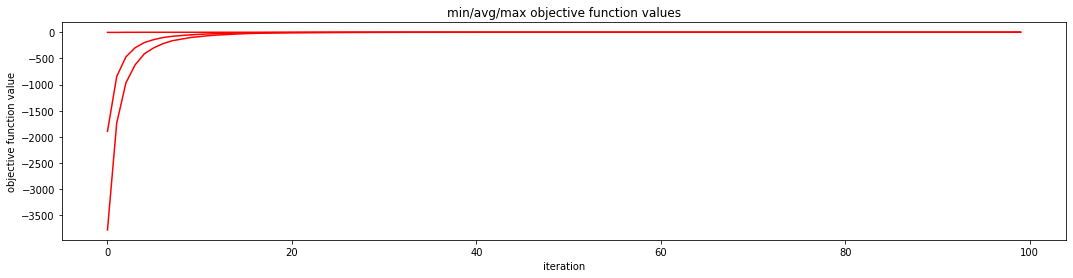

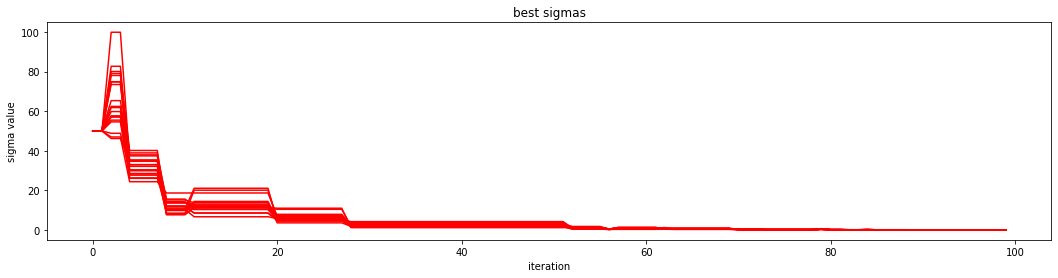

Iteration 0000 : best score = -16.83837244, mean score = -1881.96119832.
plots for d (dimensions): 50, N (population size): 500, T (iterations): 100, best obj value: -0.00018013486335553987


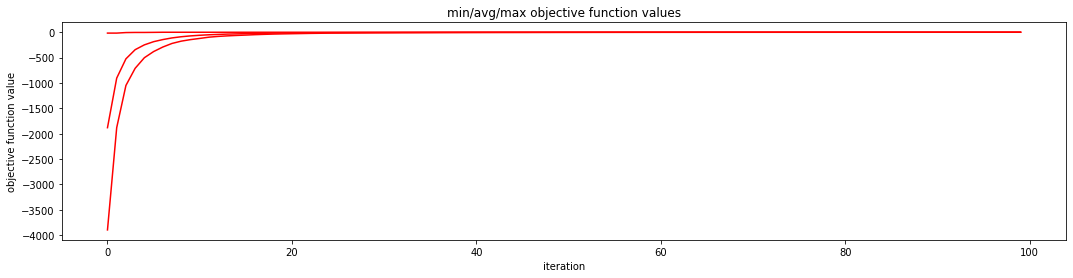

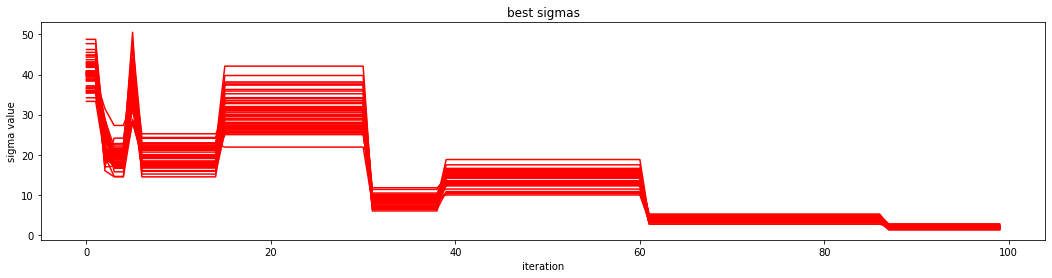

Iteration 0000 : best score = -3.11700313, mean score = -1846.04861029.
plots for d (dimensions): 100, N (population size): 500, T (iterations): 100, best obj value: -0.0012083882416687956


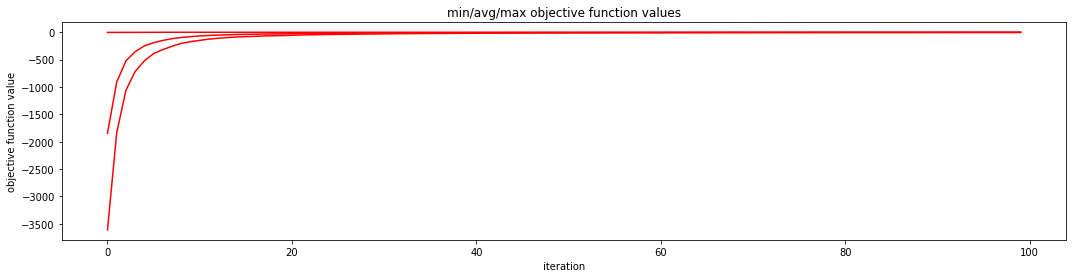

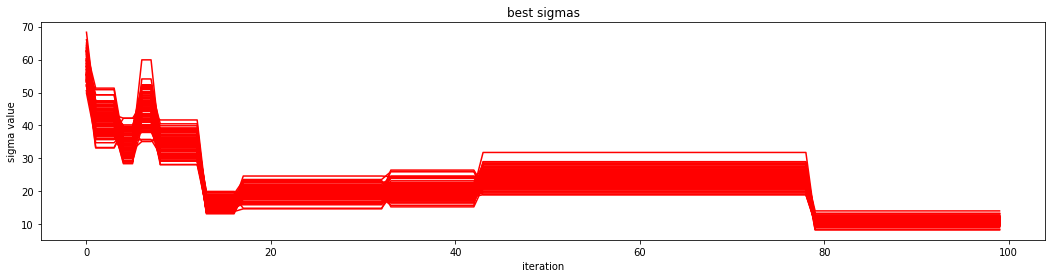

In [277]:
print("================================================== SPHERIC FUNCTION A ==================================================")
esfordifferentparams(objective_function_F1a, [10, 20, 50, 100], [500], [100] )
print("================================================== SPHERIC FUNCTION B ==================================================")
esfordifferentparams(objective_function_F1b, [10, 20, 50, 100], [500], [100] )
print("================================================== SPHERIC FUNCTION C ==================================================")
esfordifferentparams(objective_function_F1c, [10, 20, 50, 100], [500], [100] )

Zadanie 4.
Inverse Kinematics

In [279]:
def calculate_arm_end(angles, arm_lengths):
    arm_end = (0, 0)
    for i in range(angles.shape[0]):
        arm_end = (arm_end[0] + arm_lengths[i] * np.cos(angles[i]), arm_end[1] + arm_lengths[i] * np.sin(angles[i]))
    #print("arm_end:", arm_end)
    return arm_end

def points_distance(a, b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def objective_function_kinematics(population, arm_lengths, goal):
    res = np.zeros(population.shape[0])
    for i in range(population.shape[0]):
        res[i] = - points_distance(goal, calculate_arm_end(population[i], arm_lengths) )
        #print("arm end: ", calculate_arm_end(population[i], arm_lengths), " goal: ", goal, " distance: ", -res[i])
    return res

def angles_to_points(angles, arm_lengths):
    #print("angles to points:", angles, "armlens: ", arm_lengths)
    pts = np.zeros( (angles.shape[0] + 1, 2) )
    pts[0] = np.array( [0, 0] )
    for i in range(angles.shape[0]):
        pts[i + 1] = np.array( [pts[i][0] + arm_lengths[i] * np.cos(angles[i]), pts[i][1] + arm_lengths[i] * np.sin(angles[i])] )
    return pts

def clip_population(population):
    for i in range(population.shape[0]):
        for j in range(population.shape[1]):
            if population[i][j] > np.pi:
                population[i][j] = np.pi
            elif population[i][j] < -np.pi:
                population[i][j] = -np.pi
    return population

def plot_arm(angles, arm_lengths, goal):
    #print("plot angles:", angles, " end!!!")
    #print("arm end:", calculate_arm_end(angles, arm_lengths))
    pts = angles_to_points(angles, arm_lengths)
    plt.plot( pts[:,0], pts[:,1] )
    plt.plot( goal[0], goal[1], 'k*')
    plt.show()

In [280]:
def es_kinematics(objective_function, arm_lengths, goal_point, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = -100000000.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions, arm_lengths, goal_point)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        children_population_solutions = clip_population(children_population_solutions)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions, arm_lengths, goal_point)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))
            print("best solution objective value: ", best_solution_objective_value)
            plot_arm(best_solution, arm_lengths, goal_point)

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

In [281]:
def gen_test_hard(goal, segments):
    goal_point = goal
    arm_lengths = np.random.normal(goal[0] / segments + (segments * 0.4), 10, segments)
    return goal_point, arm_lengths

def gen_test_easy(goal, segments):
    goal_point = goal
    arm_lengths = np.random.normal(goal[0] / segments + (segments * 0.8), 10, segments)
    return goal_point, arm_lengths


def eskinematicsfordifferentparams(d, arm_lengths, goal_point, differentNs, differentTs):
    for N in differentNs:
        for T in differentTs:
            best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es_kinematics(objective_function_kinematics, arm_lengths, goal_point, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 50)
            print(f"plots for d (dimensions): {d}, N (population size): {N}, T (iterations): {T}, best obj value: {best_objective_value}")
            plothistory( history_objective_values, history_best_sigmas )

robot segments: 10
Iteration 0000 : best score = -4.76763199, mean score = -47.09490825.
best solution objective value:  -4.767631985098281


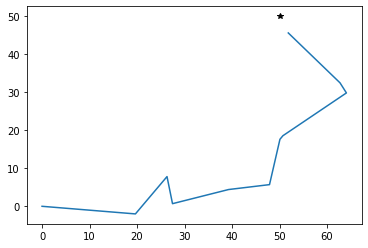

Iteration 0050 : best score = -0.43581830, mean score = -11.65849512.
best solution objective value:  -0.43581829931606203


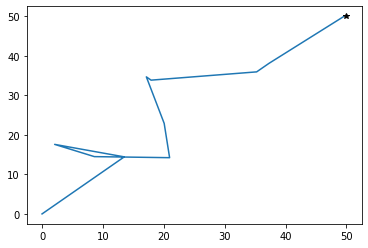

Iteration 0100 : best score = -0.43581830, mean score = -8.83877785.
best solution objective value:  -0.43581829931606203


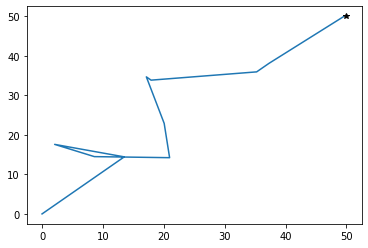

Iteration 0150 : best score = -0.43581830, mean score = -7.21085100.
best solution objective value:  -0.43581829931606203


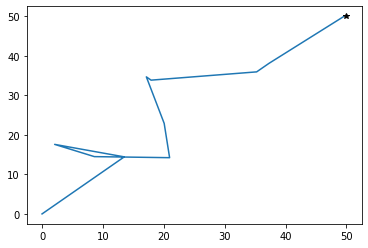

Iteration 0200 : best score = -0.30362046, mean score = -6.21243531.
best solution objective value:  -0.3036204579750324


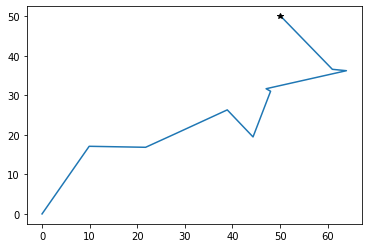

Iteration 0250 : best score = -0.30362046, mean score = -5.64876220.
best solution objective value:  -0.3036204579750324


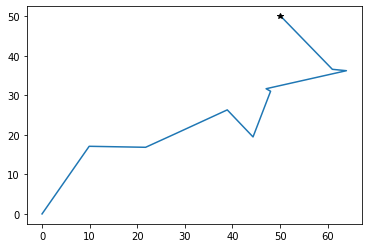

plots for d (dimensions): 10, N (population size): 500, T (iterations): 300, best obj value: -0.3036204579750324


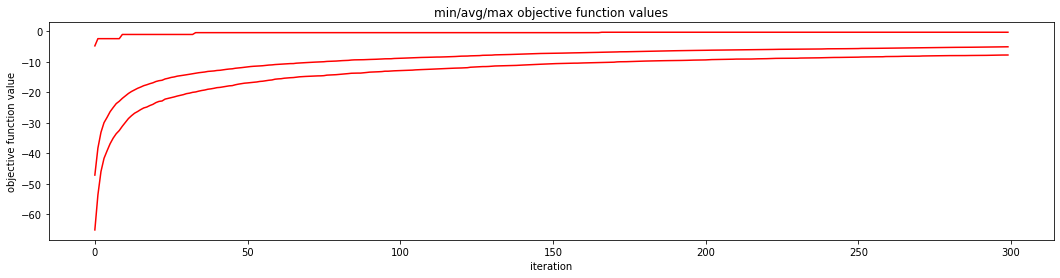

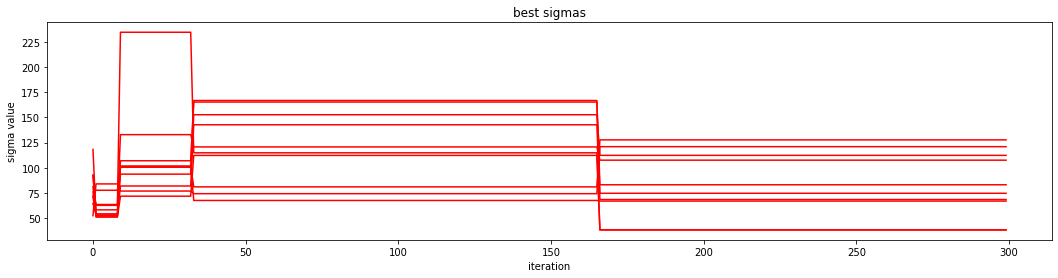

robot segments: 20
Iteration 0000 : best score = -5.59488511, mean score = -91.63559980.
best solution objective value:  -5.594885106608302


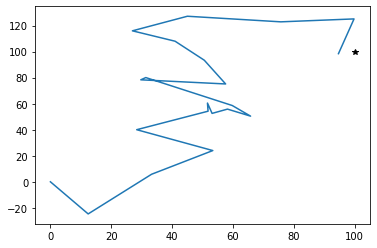

Iteration 0050 : best score = -0.65148021, mean score = -17.10101648.
best solution objective value:  -0.6514802106733824


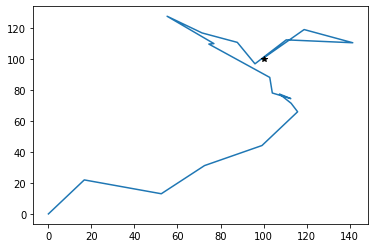

Iteration 0100 : best score = -0.65148021, mean score = -12.41042666.
best solution objective value:  -0.6514802106733824


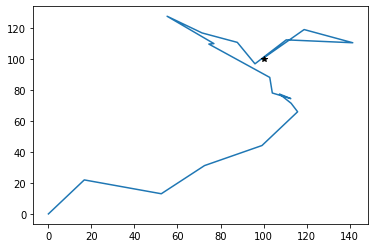

Iteration 0150 : best score = -0.52786628, mean score = -9.89974256.
best solution objective value:  -0.5278662769306657


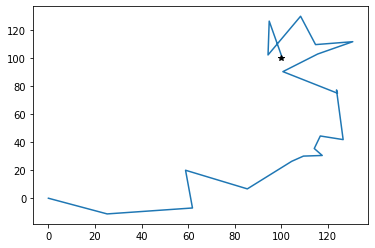

Iteration 0200 : best score = -0.52786628, mean score = -8.72760102.
best solution objective value:  -0.5278662769306657


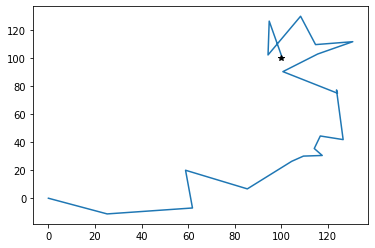

Iteration 0250 : best score = -0.52786628, mean score = -7.94229753.
best solution objective value:  -0.5278662769306657


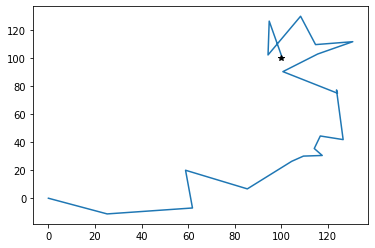

plots for d (dimensions): 20, N (population size): 500, T (iterations): 300, best obj value: -0.5278662769306657


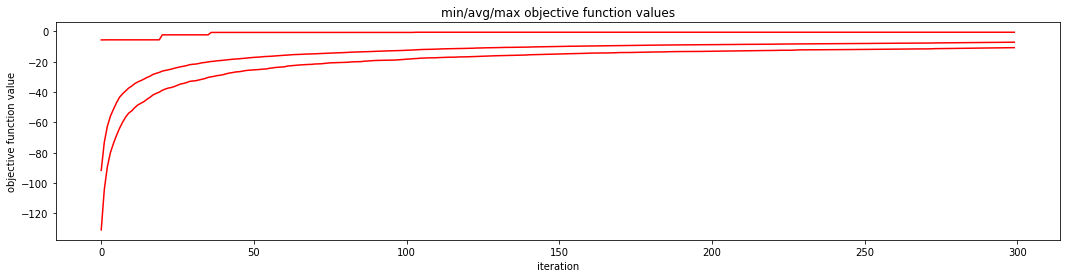

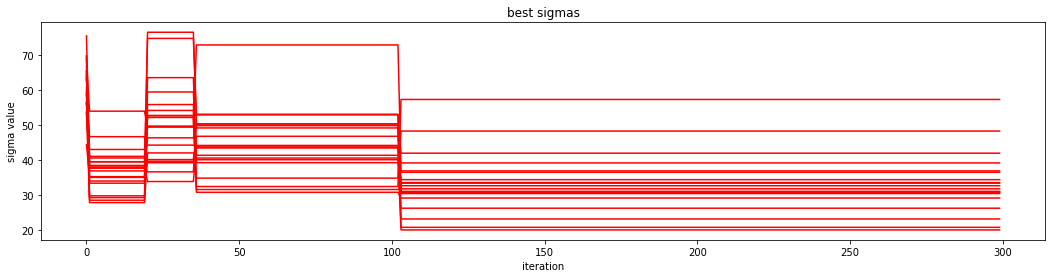

robot segments: 50
Iteration 0000 : best score = -16.62967738, mean score = -224.40138480.
best solution objective value:  -16.629677375847578


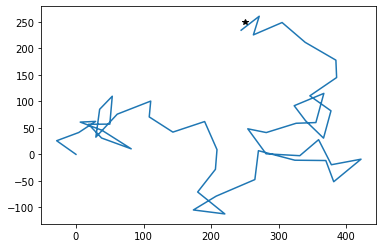

Iteration 0050 : best score = -1.14341187, mean score = -38.21476664.
best solution objective value:  -1.1434118707051986


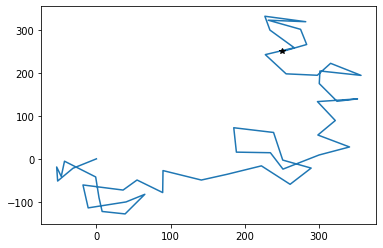

Iteration 0100 : best score = -1.14341187, mean score = -27.49513547.
best solution objective value:  -1.1434118707051986


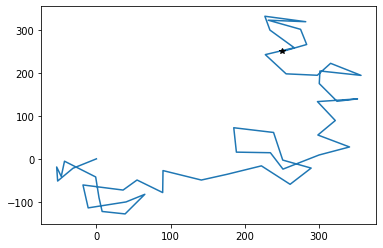

Iteration 0150 : best score = -1.14341187, mean score = -22.34213462.
best solution objective value:  -1.1434118707051986


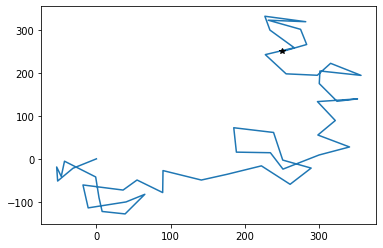

Iteration 0200 : best score = -1.14341187, mean score = -19.10523370.
best solution objective value:  -1.1434118707051986


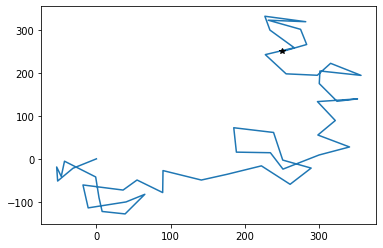

Iteration 0250 : best score = -1.14341187, mean score = -17.26100074.
best solution objective value:  -1.1434118707051986


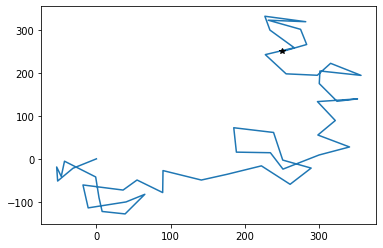

plots for d (dimensions): 50, N (population size): 500, T (iterations): 300, best obj value: -1.1434118707051986


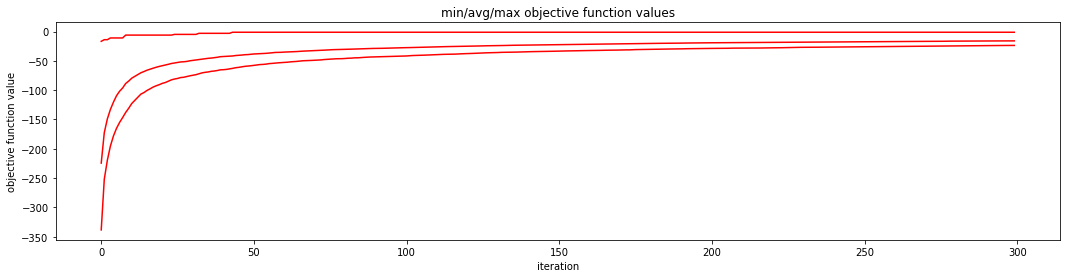

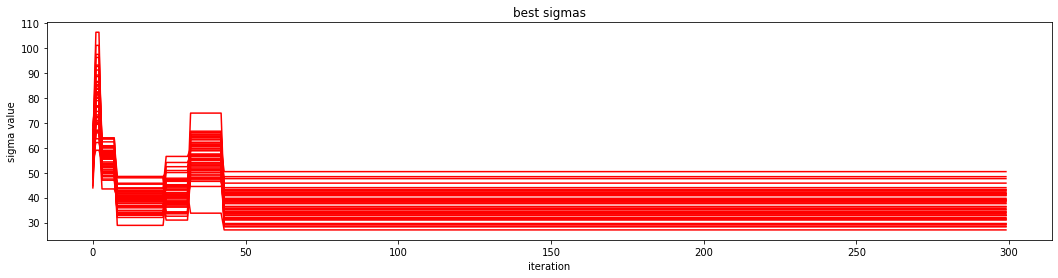

robot segments: 100
Iteration 0000 : best score = -44.91709022, mean score = -492.29036039.
best solution objective value:  -44.91709022172409


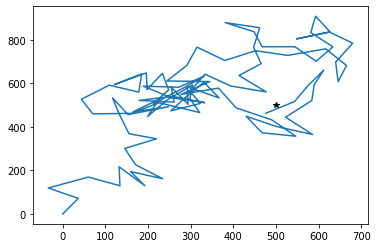

Iteration 0050 : best score = -2.31405127, mean score = -79.10029967.
best solution objective value:  -2.31405127487808


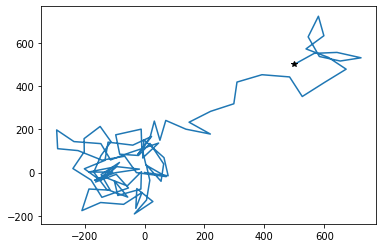

Iteration 0100 : best score = -2.31405127, mean score = -53.84097702.
best solution objective value:  -2.31405127487808


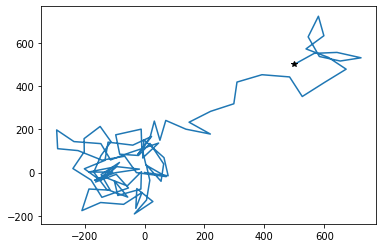

Iteration 0150 : best score = -2.31405127, mean score = -44.79192774.
best solution objective value:  -2.31405127487808


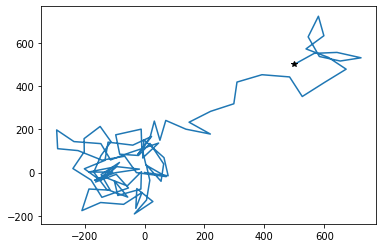

Iteration 0200 : best score = -2.31405127, mean score = -40.17922975.
best solution objective value:  -2.31405127487808


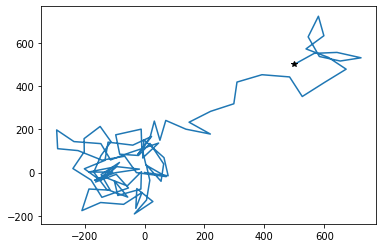

Iteration 0250 : best score = -2.31405127, mean score = -36.54188984.
best solution objective value:  -2.31405127487808


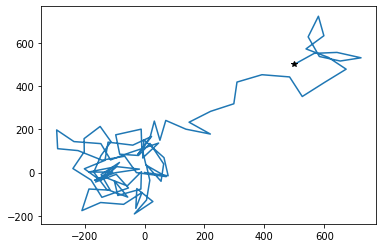

plots for d (dimensions): 100, N (population size): 500, T (iterations): 300, best obj value: -2.31405127487808


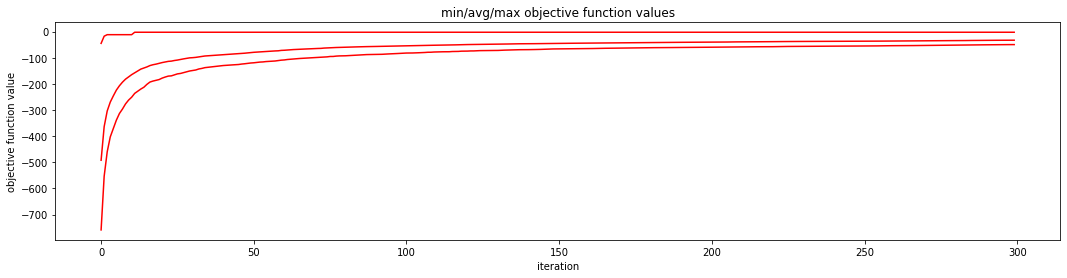

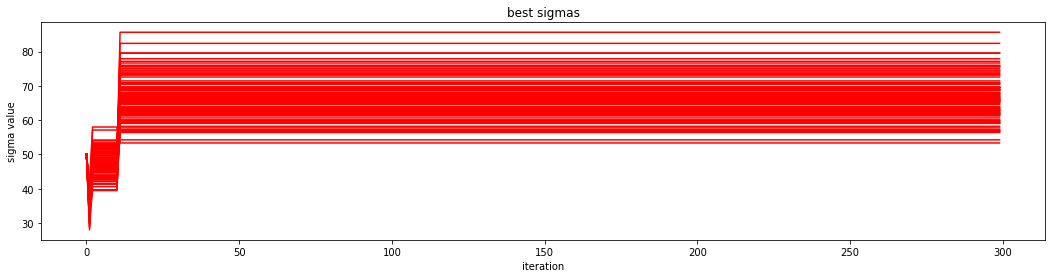

In [282]:
#test easy
for dims in [10, 20, 50, 100]:
    goal_point, arm_lengths = gen_test_easy( (dims * 5, dims * 5), dims )
    print(f"robot segments: {dims}")
    eskinematicsfordifferentparams(dims, arm_lengths, goal_point, [500], [300])

robot segments: 10
Iteration 0000 : best score = -36.42963787, mean score = -103.51948680.
best solution objective value:  -36.429637874671165


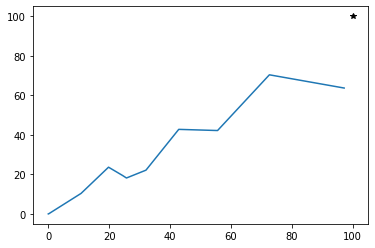

Iteration 0050 : best score = -19.46578114, mean score = -50.96176543.
best solution objective value:  -19.4657811440895


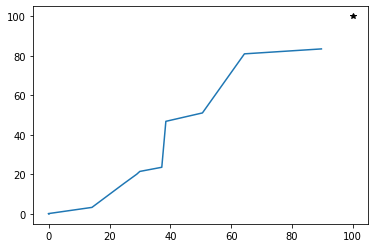

Iteration 0100 : best score = -19.46578114, mean score = -44.98531664.
best solution objective value:  -19.4657811440895


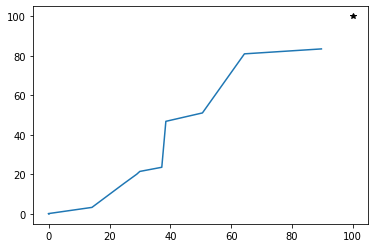

Iteration 0150 : best score = -16.38745438, mean score = -41.14283927.
best solution objective value:  -16.38745437748646


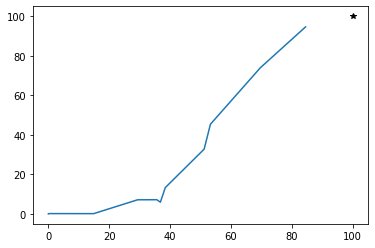

Iteration 0200 : best score = -14.45620084, mean score = -39.00241251.
best solution objective value:  -14.45620084015162


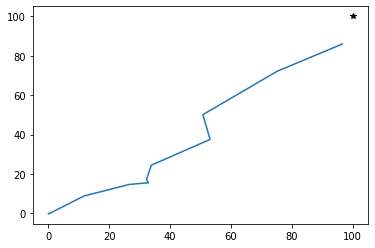

Iteration 0250 : best score = -14.45620084, mean score = -37.95689095.
best solution objective value:  -14.45620084015162


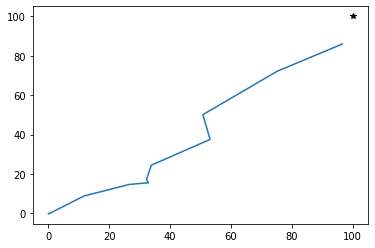

plots for d (dimensions): 10, N (population size): 500, T (iterations): 300, best obj value: -14.45620084015162


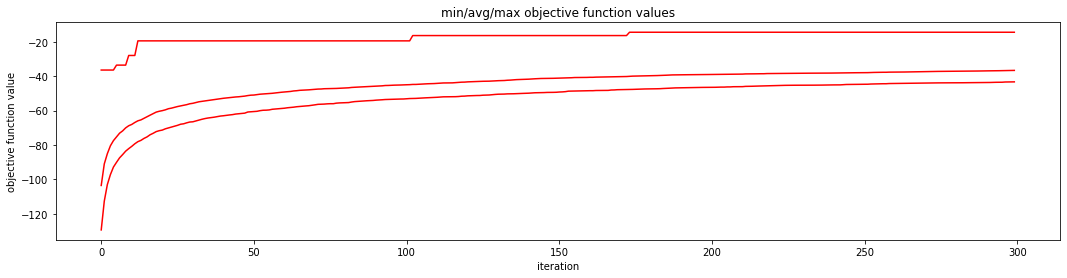

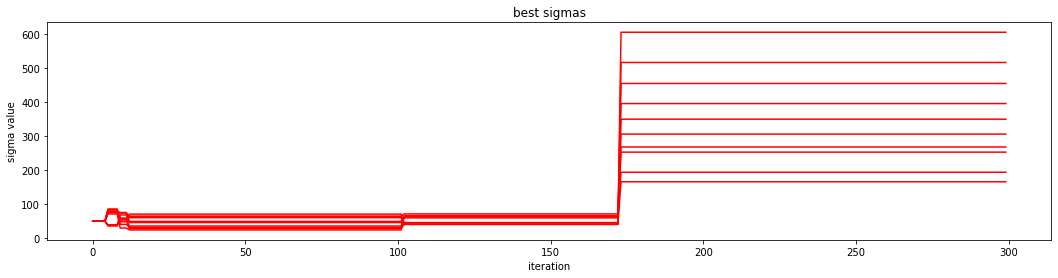

robot segments: 20
Iteration 0000 : best score = -105.30336731, mean score = -221.17546152.
best solution objective value:  -105.30336730945955


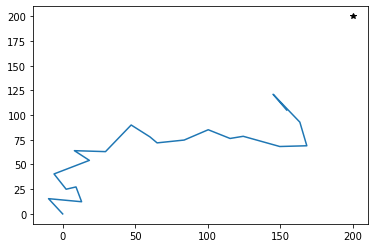

Iteration 0050 : best score = -31.44833989, mean score = -119.58073373.
best solution objective value:  -31.448339893572477


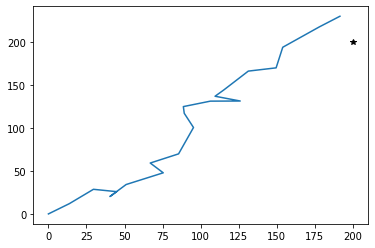

Iteration 0100 : best score = -22.57447627, mean score = -106.49020537.
best solution objective value:  -22.574476274858394


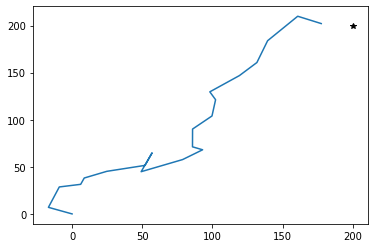

Iteration 0150 : best score = -22.57447627, mean score = -99.39636371.
best solution objective value:  -22.574476274858394


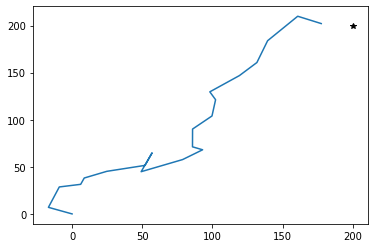

Iteration 0200 : best score = -22.50786561, mean score = -94.58254983.
best solution objective value:  -22.5078656142356


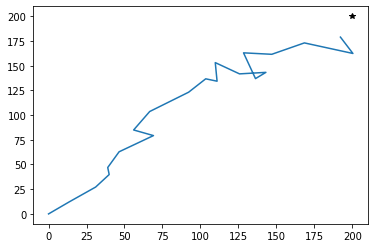

Iteration 0250 : best score = -22.50786561, mean score = -91.50828370.
best solution objective value:  -22.5078656142356


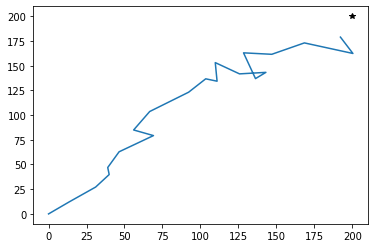

plots for d (dimensions): 20, N (population size): 1000, T (iterations): 300, best obj value: -22.5078656142356


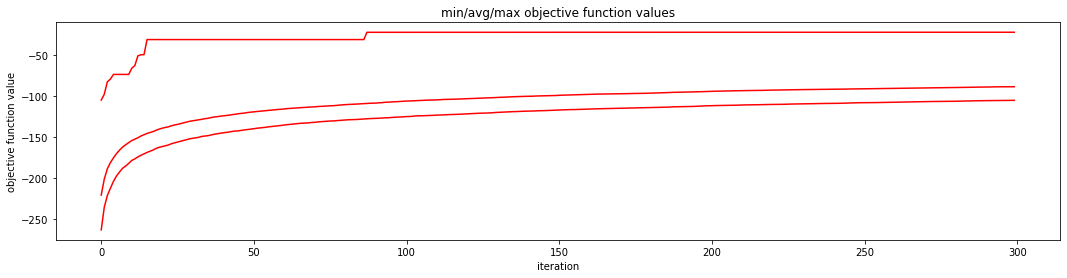

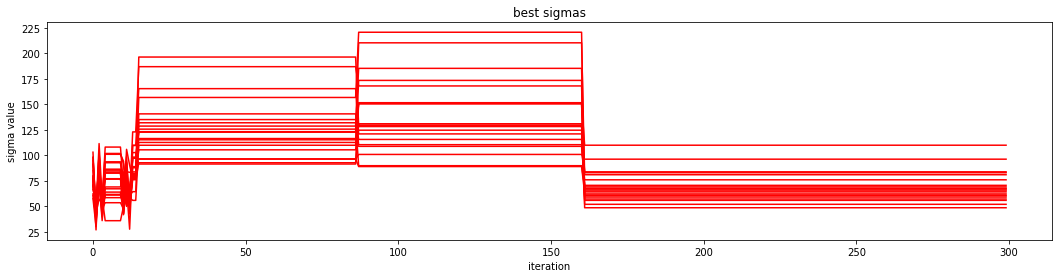

robot segments: 50
Iteration 0000 : best score = -174.08146088, mean score = -553.34565891.
best solution objective value:  -174.08146087667524


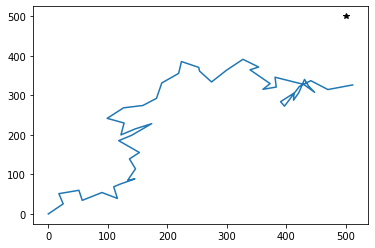

Iteration 0050 : best score = -80.90156483, mean score = -308.62401763.
best solution objective value:  -80.90156482544556


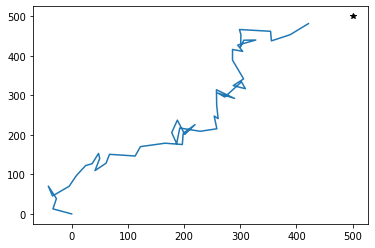

Iteration 0100 : best score = -72.64499535, mean score = -277.60268930.
best solution objective value:  -72.6449953480544


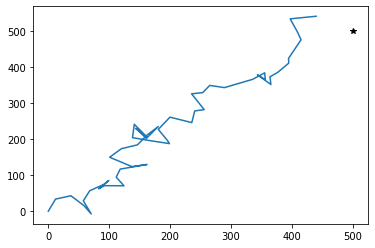

Iteration 0150 : best score = -72.64499535, mean score = -259.53052968.
best solution objective value:  -72.6449953480544


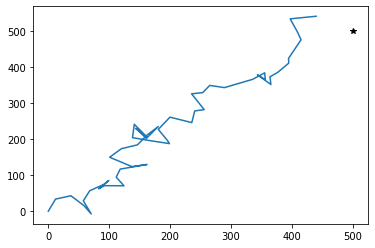

Iteration 0200 : best score = -20.00258146, mean score = -247.99914480.
best solution objective value:  -20.00258146211584


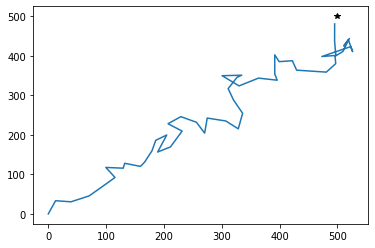

Iteration 0250 : best score = -20.00258146, mean score = -238.88144466.
best solution objective value:  -20.00258146211584


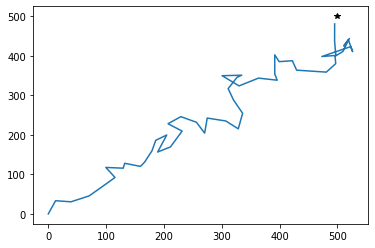

Iteration 0300 : best score = -20.00258146, mean score = -230.83212936.
best solution objective value:  -20.00258146211584


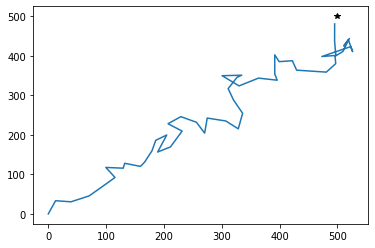

Iteration 0350 : best score = -20.00258146, mean score = -224.04611284.
best solution objective value:  -20.00258146211584


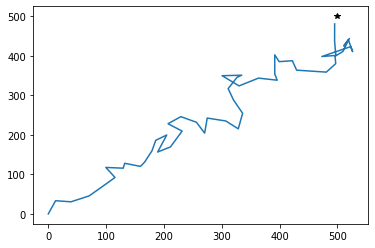

Iteration 0400 : best score = -20.00258146, mean score = -218.15215892.
best solution objective value:  -20.00258146211584


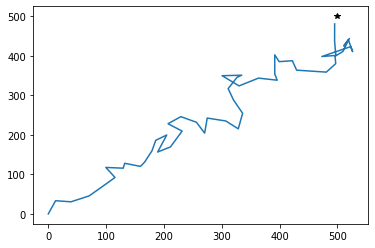

Iteration 0450 : best score = -20.00258146, mean score = -214.33400877.
best solution objective value:  -20.00258146211584


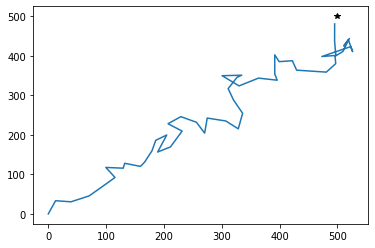

plots for d (dimensions): 50, N (population size): 1000, T (iterations): 500, best obj value: -20.00258146211584


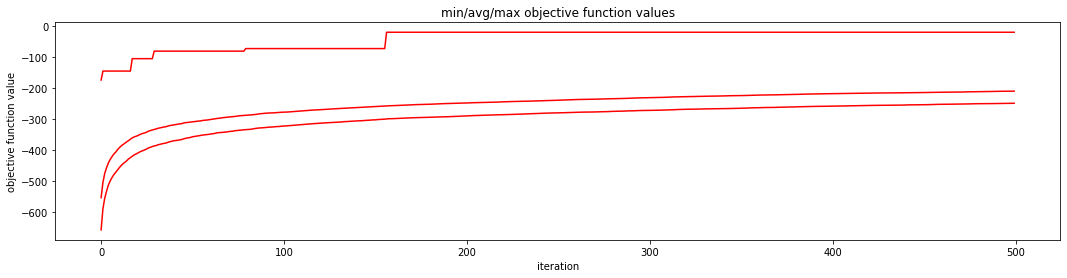

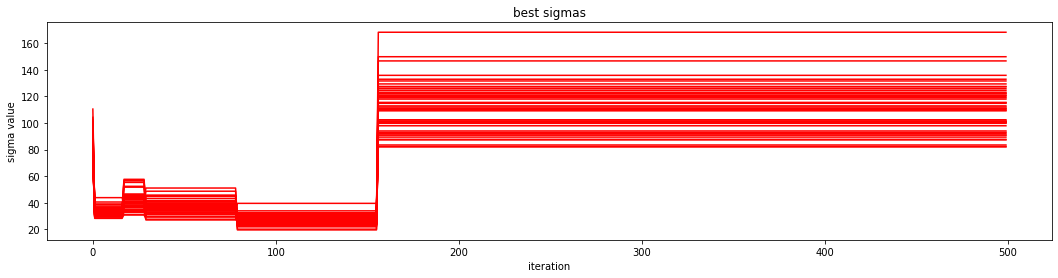

robot segments: 100
Iteration 0000 : best score = -231.50198534, mean score = -1074.34916798.
best solution objective value:  -231.5019853358701


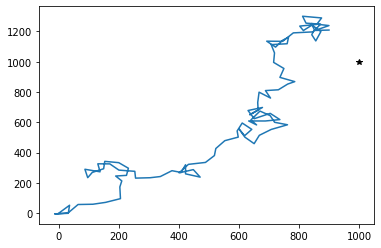

Iteration 0050 : best score = -84.43709928, mean score = -519.01602560.
best solution objective value:  -84.43709928097795


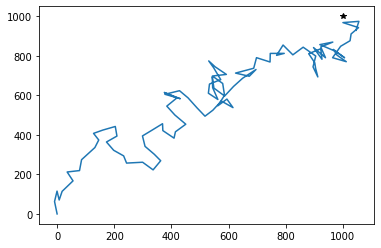

Iteration 0100 : best score = -29.85353128, mean score = -442.25288635.
best solution objective value:  -29.853531282632815


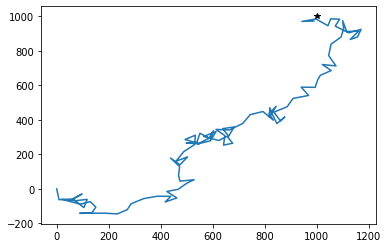

Iteration 0150 : best score = -29.85353128, mean score = -403.24046679.
best solution objective value:  -29.853531282632815


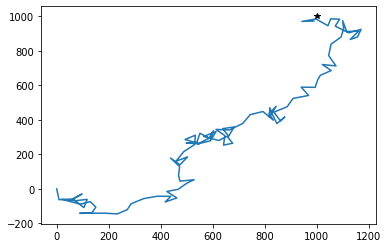

Iteration 0200 : best score = -29.85353128, mean score = -373.91520443.
best solution objective value:  -29.853531282632815


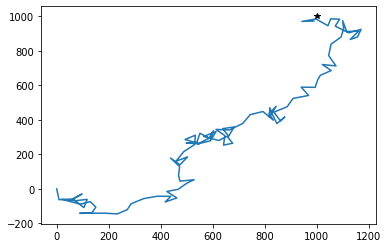

Iteration 0250 : best score = -29.85353128, mean score = -353.33844277.
best solution objective value:  -29.853531282632815


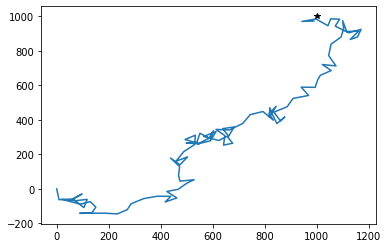

Iteration 0300 : best score = -29.85353128, mean score = -336.06144393.
best solution objective value:  -29.853531282632815


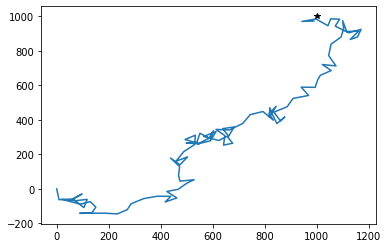

Iteration 0350 : best score = -29.85353128, mean score = -322.38143003.
best solution objective value:  -29.853531282632815


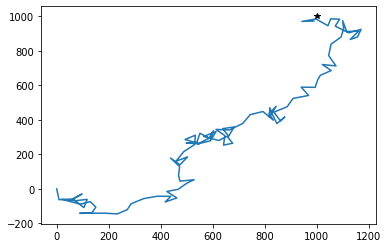

Iteration 0400 : best score = -29.85353128, mean score = -310.46560447.
best solution objective value:  -29.853531282632815


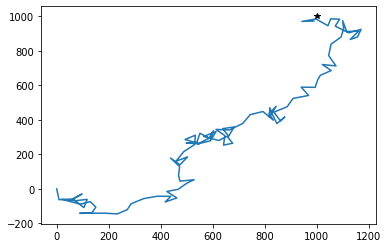

Iteration 0450 : best score = -29.85353128, mean score = -300.25113219.
best solution objective value:  -29.853531282632815


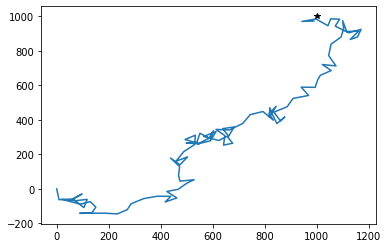

Iteration 0500 : best score = -29.85353128, mean score = -290.79542329.
best solution objective value:  -29.853531282632815


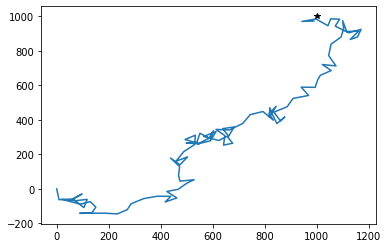

Iteration 0550 : best score = -14.24130860, mean score = -282.93571554.
best solution objective value:  -14.24130860066905


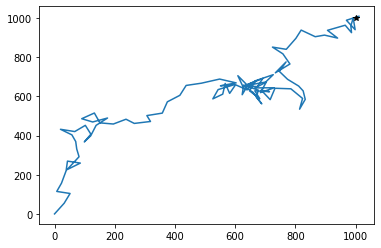

Iteration 0600 : best score = -14.24130860, mean score = -275.55876128.
best solution objective value:  -14.24130860066905


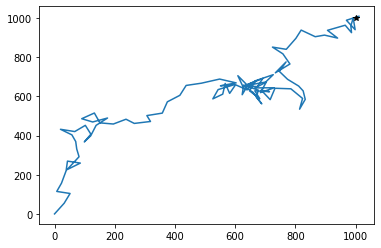

Iteration 0650 : best score = -14.24130860, mean score = -268.79767987.
best solution objective value:  -14.24130860066905


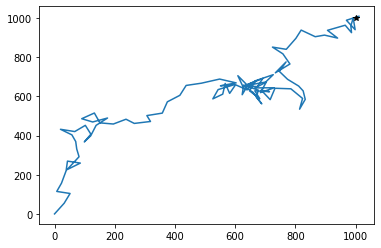

Iteration 0700 : best score = -14.24130860, mean score = -262.27703200.
best solution objective value:  -14.24130860066905


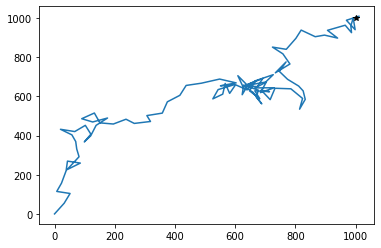

Iteration 0750 : best score = -11.94752050, mean score = -256.72987346.
best solution objective value:  -11.94752049893591


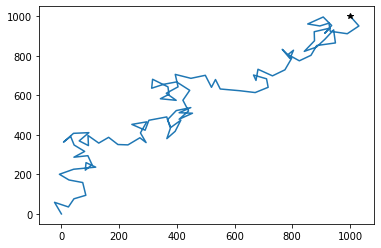

plots for d (dimensions): 100, N (population size): 1500, T (iterations): 800, best obj value: -11.94752049893591


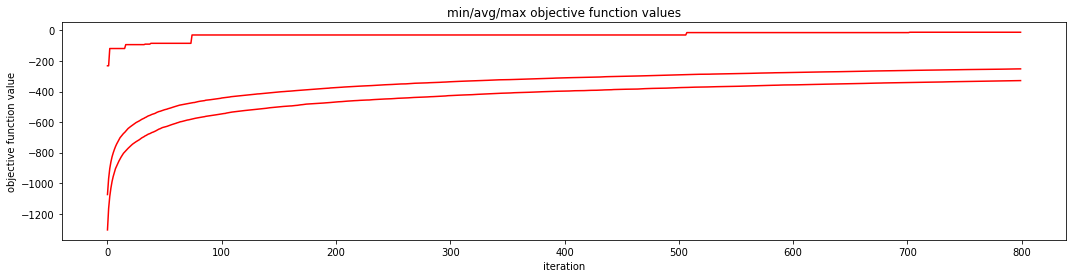

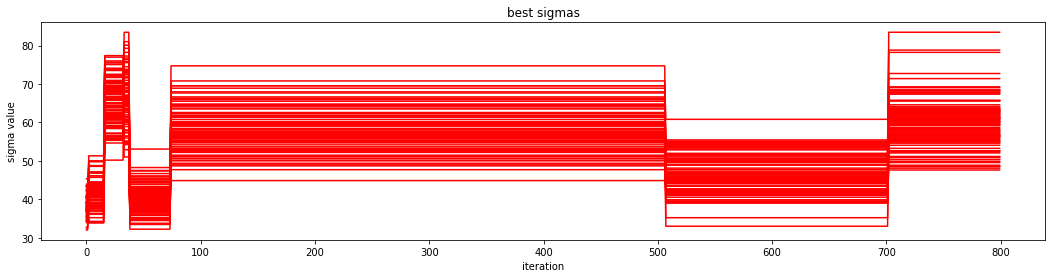

In [283]:
#test hard

dims = 10
goal_point1, arm_lengths1 = gen_test_hard( (dims * 10, dims * 10), dims )
print(f"robot segments: {dims}")
eskinematicsfordifferentparams(dims, arm_lengths1, goal_point1, [500], [300])

dims = 20
goal_point1, arm_lengths1 = gen_test_hard( (dims * 10, dims * 10), dims )
print(f"robot segments: {dims}")
eskinematicsfordifferentparams(dims, arm_lengths1, goal_point1, [1000], [300])

dims = 50
goal_point1, arm_lengths1 = gen_test_hard( (dims * 10, dims * 10), dims )
print(f"robot segments: {dims}")
eskinematicsfordifferentparams(dims, arm_lengths1, goal_point1, [1000], [500])

dims = 100
goal_point1, arm_lengths1 = gen_test_hard( (dims * 10, dims * 10), dims )
print(f"robot segments: {dims}")
eskinematicsfordifferentparams(dims, arm_lengths1, goal_point1, [1500], [800])